In [1]:
import pandas as pd
import numpy as np
from glob import glob
import re
import nltk
import seaborn as sns; sns.set()
from scipy.linalg import norm, eigh
from sklearn.decomposition import PCA
import plotly.express as px

/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

# Importing Text And Creating LIB

In [2]:
speech = open('pg925.txt', 'r', encoding='utf-8-sig') #speeches
speech_text = speech.read()
#type(speech_text)
OHCO = ['book_num','chap_num', 'para_num', 'sent_num', 'token_num']

In [3]:
lib_cols = ["book_num","Title", "Author", "Source", "Date"]
LIB = pd.DataFrame(columns=lib_cols)

In [4]:
LIB['book_num']
LIB['Title'] = ["United States Presidents' Inaugural Speeches: From Washington to George W. Bush"]
LIB['Author'] = ["Various"]
LIB['Source'] = ["https://www.gutenberg.org/ebooks/925"]
LIB["Date"] = ["August 7, 2008"]

In [5]:
LIB = LIB.set_index(['book_num'])

In [6]:
LIB.to_csv('LIB.csv', index=False)

# Cleaning Text

In [7]:
#Removing the Transcribers notes
speech_text = re.sub(r'\[[^\]]*\]', '',speech_text)
#speech_text

In [8]:
speech_text = re.sub(r'(IN) (THE)\s*([^\n\r]*)', '',speech_text)#removes the IN THE CITY/IN THE WASHINGTON DC lines

In [9]:
speech_text = re.sub(r'(IN) (WASHINGTON)\s*([^\n\r]*)', '',speech_text)#removes the one IN WASHINGTON DC

In [10]:
speech_text = re.sub(r'\*\s\*\s\*\s\*\s\*', '',speech_text)#removes the ***** lines dividing the speeches

In [11]:
text_file = open("cleaned_speech.txt", "wt")
n = text_file.write(speech_text)
text_file.close()

# Building the Corpus

In [12]:
LINES = pd.DataFrame(open('cleaned_speech.txt', 'r', encoding='utf-8-sig').readlines(), columns=['line_str'])
LINES.index.name = 'line_num'
LINES.line_str = LINES.line_str.str.replace(r'\n+', ' ', regex=True).str.strip()

In [13]:
title = LINES.loc[0].line_str.replace("Project Gutenberg's ", '')

In [14]:
title

"United States Presidents' Inaugural Speeches, by Various"

In [15]:
clip_pats = [
    r"\*\*\*\s*START OF (?:THE|THIS) PROJECT", 
    r"NOTES--PRESIDENTS WHO WERE NOT INAUGURATED"
]

In [16]:
pat_a = LINES.line_str.str.match(clip_pats[0])
pat_b = LINES.line_str.str.match(clip_pats[1])

In [17]:
line_a = LINES.loc[pat_a].index[0] + 1
line_b = LINES.loc[pat_b].index[0] - 1

In [18]:
line_a, line_b

(20, 13901)

In [19]:
LINES = LINES.loc[line_a : line_b]

In [20]:
#LINES.tail(10)

In [21]:
chap_pat = r'[A-Z \.,]* (INAUGURAL ADDRESS)'

In [22]:
chap_lines = LINES.line_str.str.match(chap_pat) # Returns a truth vector

In [23]:
LINES.loc[chap_lines]

line_str
line_num                                                   
43               GEORGE WASHINGTON, FIRST INAUGURAL ADDRESS
190             GEORGE WASHINGTON, SECOND INAUGURAL ADDRESS
221                            JOHN ADAMS INAUGURAL ADDRESS
454                THOMAS JEFFERSON FIRST INAUGURAL ADDRESS
625               THOMAS JEFFERSON SECOND INAUGURAL ADDRESS
846                   JAMES MADISON FIRST INAUGURAL ADDRESS
971                 JAMES MADISON, SECOND INAUGURAL ADDRESS
1103                   JAMES MONROE FIRST INAUGURAL ADDRESS
1434                 JAMES MONROE, SECOND INAUGURAL ADDRESS
1867                   JOHN QUINCY ADAMS, INAUGURAL ADDRESS
2150                ANDREW JACKSON, FIRST INAUGURAL ADDRESS
2283               ANDREW JACKSON, SECOND INAUGURAL ADDRESS
2415                    MARTIN VAN BUREN, INAUGURAL ADDRESS
2796              WILLIAM HENRY HARRISON, INAUGURAL ADDRESS
3562                     JAMES KNOX POLK, INAUGURAL ADDRESS
4034                      ZACHARY TAYLOR, INAUGURAL ADDRESS
4160                     FRANKLIN PIERCE, INAUGURAL ADDRESS
4485                      JAMES BUCHANAN, INAUGURAL ADDRESS
4773               ABRAHAM LINCOLN, FIRST INAUGURAL ADDRESS
5143              ABRAHAM LINCOLN, SECOND INAUGURAL ADDRESS
5221              ULYSSES S. GRANT, FIRST INAUGURAL ADDRESS
5351             ULYSSES S. GRANT, SECOND INAUGURAL ADDRESS
5502                 RUTHERFORD B. HAYES, INAUGURAL ADDRESS
5773                    JAMES A. GARFIELD INAUGURAL ADDRESS
6103              GROVER CLEVELAND, FIRST INAUGURAL ADDRESS
6293                   BENJAMIN HARRISON, INAUGURAL ADDRESS
6737             GROVER CLEVELAND, SECOND INAUGURAL ADDRESS
6969               WILLIAM MCKINLEY FIRST INAUGURAL ADDRESS
7350             WILLIAM MCKINLEY, SECOND INAUGURAL ADDRESS
7577                  THEODORE ROOSEVELT, INAUGURAL ADDRESS
7678                 WILLIAM HOWARD TAFT, INAUGURAL ADDRESS
8219                WOODROW WILSON, FIRST INAUGURAL ADDRESS
8387               WOODROW WILSON, SECOND INAUGURAL ADDRESS
8548                   WARREN G. HARDING, INAUGURAL ADDRESS
8905                     CALVIN COOLIDGE, INAUGURAL ADDRESS
9296                      HERBERT HOOVER, INAUGURAL ADDRESS
9716         FRANKLIN D. ROOSEVELT, FIRST INAUGURAL ADDRESS
9924        FRANKLIN D. ROOSEVELT, SECOND INAUGURAL ADDRESS
10142        FRANKLIN D. ROOSEVELT, THIRD INAUGURAL ADDRESS
10320       FRANKLIN D. ROOSEVELT, FOURTH INAUGURAL ADDRESS
10404                    HARRY S. TRUMAN, INAUGURAL ADDRESS
10722         DWIGHT D. EISENHOWER, FIRST INAUGURAL ADDRESS
11012        DWIGHT D. EISENHOWER, SECOND INAUGURAL ADDRESS
11221                    JOHN F. KENNEDY, INAUGURAL ADDRESS
11386              LYNDON BAINES JOHNSON, INAUGURAL ADDRESS
11578        RICHARD MILHOUS NIXON, FIRST INAUGURAL ADDRESS
11868       RICHARD MILHOUS NIXON, SECOND INAUGURAL ADDRESS
12101                       JIMMY CARTER, INAUGURAL ADDRESS
12262                RONALD REAGAN, FIRST INAUGURAL ADDRESS
12528               RONALD REAGAN, SECOND INAUGURAL ADDRESS
12815                        GEORGE BUSH, INAUGURAL ADDRESS
13051     WILLIAM JEFFERSON CLINTON, FIRST INAUGURAL ADD...
13221     WILLIAM JEFFERSON CLINTON, SECOND INAUGURAL AD...
13461               GEORGE W. BUSH, FIRST INAUGURAL ADDRESS
13674              GEORGE W. BUSH, SECOND INAUGURAL ADDRESS

In [24]:
chap_nums = [i+1 for i in range(LINES.loc[chap_lines].shape[0])]

In [25]:
LINES.loc[chap_lines, 'chap_num'] = chap_nums

In [26]:
LINES.loc[chap_lines, 'chap_num'] = [i+1 for i in range(LINES.loc[chap_lines].shape[0])]

In [27]:
#testing to see if that worked
#LINES.loc[chap_lines] 

In [28]:
LINES.chap_num = LINES.chap_num.ffill()

In [29]:
LINES = LINES.loc[~LINES.chap_num.isna()] # Remove chapter heading lines
LINES = LINES.dropna(subset=['chap_num'])
LINES = LINES.loc[~chap_lines] # Remove everything before Chapter 1
LINES.chap_num = LINES.chap_num.astype('int') # Convert chap_num from float to int

In [30]:
LINES['book_num'] = '1'

In [31]:
CHAPS = LINES.groupby(OHCO[:2]).line_str.apply(lambda x: '\n'.join(x)).to_frame('chap_str')

In [32]:
#CHAPS.head()

In [33]:
PARAS = CHAPS['chap_str'].str.split(r'\n\n+', expand=True).stack()\
    .to_frame('para_str')
PARAS.index.names = OHCO[:3] 

In [34]:
#PARAS.head()

In [35]:
SENTS = PARAS['para_str'].str.split(r'[.?!;:"]+', expand=True).stack()\
    .to_frame().rename(columns={0:'sent_str'})
SENTS.index.names = OHCO[:4]
SENTS = SENTS[~SENTS['sent_str'].str.match(r'^\s*$')] # Remove empty paragraphs
SENTS.sent_str = SENTS.sent_str.str.strip()

In [36]:
#SENTS.head()

In [37]:
nltk_resources = [
    'tokenizers/punkt', 
    'taggers/averaged_perceptron_tagger', 
    'corpora/stopwords', 
    'help/tagsets'
]

In [38]:
for rsc in nltk_resources:
    try:
        nltk.data.find(rsc)
    except IndexError:
        nltk.download(rsc)

In [39]:
keep_whitespace = True
if keep_whitespace:
    TOKENS = SENTS.sent_str\
            .apply(lambda x: pd.Series(nltk.pos_tag(nltk.word_tokenize(x))))\
            .stack()\
            .to_frame('pos_tuple')
else:
    TOKENS = SENTS.sent_str\
            .apply(lambda x: pd.Series(nltk.pos_tag(nltk.WhitespaceTokenizer().tokenize(x))))\
            .stack()\
            .to_frame('pos_tuple')

In [40]:
TOKENS.index.names = OHCO

In [41]:
TOKENS['pos'] = TOKENS.pos_tuple.apply(lambda x: x[1])
TOKENS['token_str'] = TOKENS.pos_tuple.apply(lambda x: x[0])
TOKENS['term_str'] = TOKENS.token_str.str.lower()

In [42]:
#TOKENS

In [43]:
TOKENS.to_csv("TOKENS.csv")
df1 = pd.read_csv("TOKENS.csv")
CORPUS = df1
CORPUS = CORPUS.set_index(OHCO)

In [44]:
CORPUS

pos_tuple  \
book_num chap_num para_num sent_num token_num                               
1        1        1        0        0          ('Fellow-Citizens', 'NNS')   
                                    1                        ('of', 'IN')   
                                    2                       ('the', 'DT')   
                                    3                   ('Senate', 'NNP')   
                                    4                       ('and', 'CC')   
...                                                                   ...   
         55       32       0        10                      ('the', 'DT')   
                                    11                  ('United', 'NNP')   
                                    12                 ('States', 'NNPS')   
                                    13                       ('of', 'IN')   
                                    14                 ('America', 'NNP')   

                                                pos        token_str  \
book_num chap_num para_num sent_num token_num                          
1        1        1        0        0           NNS  Fellow-Citizens   
                                    1            IN               of   
                                    2            DT              the   
                                    3           NNP           Senate   
                                    4            CC              and   
...                                             ...              ...   
         55       32       0        10           DT              the   
                                    11          NNP           United   
                                    12         NNPS           States   
                                    13           IN               of   
                                    14          NNP          America   

                                                      term_str  
book_num chap_num para_num sent_num token_num                   
1        1        1        0        0          fellow-citizens  
                                    1                       of  
                                    2                      the  
                                    3                   senate  
                                    4                      and  
...                                                        ...  
         55       32       0        10                     the  
                                    11                  united  
                                    12                  states  
                                    13                      of  
                                    14                 america  

[137127 rows x 4 columns]

In [45]:
CORPUS.to_csv("CORPUS.csv")

# Vocab

In [46]:
OHCO2 = ['book_num', 'chap_num', 'para_num', 'sent_num', 'token_num']

SENTS = OHCO2[:4]
PARAS = OHCO2[:3]
CHAPS = OHCO2[:2]
BOOKS = OHCO2[:1]

In [47]:
VOCAB = TOKENS.term_str.value_counts().to_frame('n')
VOCAB.index.name = 'term_str'
VOCAB['p'] = VOCAB.n / VOCAB.n.sum()
VOCAB['i'] = -np.log2(VOCAB.p)
VOCAB['n_chars'] = VOCAB.index.str.len()

In [48]:
VOCAB['max_pos'] = TOKENS[['term_str','pos']].value_counts().unstack(fill_value=0).idxmax(1)
TPM = TOKENS[['term_str', 'pos']].value_counts().unstack()
VOCAB['n_pos'] = TPM.count(axis = 1)
VOCAB['cat_pos'] = TOKENS[['term_str', 'pos']].value_counts().to_frame('n').reset_index().groupby('term_str').pos.apply(lambda x: set(x))

In [49]:
from hw07 import create_bow, get_pca, get_tfidf

In [50]:
sw = pd.DataFrame(nltk.corpus.stopwords.words('english'), columns=['term_str'])
sw = sw.reset_index().set_index('term_str')
sw.columns = ['dummy']
sw.dummy = 1

In [51]:
VOCAB['stop'] = VOCAB.index.map(sw.dummy)
VOCAB['stop'] = VOCAB['stop'].fillna(0).astype('int')

In [52]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
VOCAB['p_stem'] = VOCAB.apply(lambda x: stemmer.stem(x.name), 1)

In [53]:
VOCAB.to_csv('VOCAB.csv')

In [54]:
if 'term_rank' not in VOCAB.columns:
    VOCAB = VOCAB.sort_values('n', ascending=False).reset_index()
    VOCAB.index.name = 'term_rank'
    VOCAB = VOCAB.reset_index()
    VOCAB['term_rank'] = VOCAB['term_rank'] + 1
    VOCAB = VOCAB.set_index('term_str')

In [55]:
new_rank = VOCAB.n.value_counts()\
    .sort_index(ascending=False).reset_index().reset_index()\
    .rename(columns={'level_0':'term_rank2', 'index':'n', 'n':'nn'})\
    .set_index('n')

In [56]:
VOCAB['term_rank2'] = VOCAB.n.map(new_rank.term_rank2) + 1

In [57]:
VOCAB['zipf_k'] = VOCAB.n * VOCAB.term_rank
VOCAB['zipf_k2'] = VOCAB.n * VOCAB.term_rank2

In [58]:
BOW = create_bow(CORPUS, CHAPS)

In [59]:
TFIDF, DFIDF = get_tfidf(BOW, 'max', 'standard')

In [60]:
TFIDF.to_csv("TFIDF.csv")

In [61]:
center_by_mean = False
center_by_variance = False
LOADINGS, DCM, COMPINF = get_pca(TFIDF, k=3)

In [62]:
DCM

pc_id                     0         1         2
book_num chap_num                              
1        1         0.125668 -0.244575  0.192895
         2        -0.019088 -0.167986  0.387437
         3         0.163346 -0.178485  0.041643
         4         0.075571 -0.232128 -0.017249
         5         0.149913 -0.172958  0.065957
         6         0.156281 -0.268811  0.147837
         7         0.060116 -0.126320  0.245772
         8         0.278634 -0.102356 -0.113025
         9         0.275753 -0.051343 -0.131015
         10        0.231966 -0.203902 -0.097929
         11        0.212900 -0.192545  0.119107
         12        0.151786 -0.176961 -0.049404
         13        0.229041 -0.105102 -0.104279
         14        0.271982 -0.078567 -0.179570
         15        0.296042 -0.079027 -0.221294
         16        0.196880 -0.082699  0.067167
         17        0.161152 -0.064995 -0.106326
         18        0.252829 -0.000036 -0.194668
         19        0.187115 -0.040541 -0.156410
         20       -0.009010 -0.127395  0.224401
         21        0.102265  0.065439  0.056644
         22        0.098989  0.013249  0.049372
         23        0.216439  0.089939 -0.059915
         24        0.139012  0.162678 -0.093295
         25        0.129213  0.141319  0.045698
         26        0.183694  0.212689 -0.075530
         27        0.110567  0.182013  0.116593
         28        0.243725  0.334526 -0.068830
         29        0.109028  0.194649  0.032172
         30       -0.087150  0.119489  0.226961
         31        0.179276  0.348848 -0.092367
         32       -0.095734  0.125450  0.178132
         33       -0.078669  0.047732  0.193198
         34       -0.104046  0.247456  0.110184
         35        0.043837  0.296698 -0.081596
         36        0.028112  0.354360  0.006655
         37       -0.069625  0.199680  0.169679
         38       -0.182688  0.133268  0.087268
         39       -0.201946 -0.007499  0.078129
         40       -0.211113 -0.067927  0.185732
         41       -0.151026  0.206092  0.128000
         42       -0.187538  0.031037  0.170958
         43       -0.218368  0.025527  0.046658
         44       -0.248235 -0.116442 -0.057792
         45       -0.212479 -0.119715  0.016074
         46       -0.313761 -0.088064 -0.084315
         47       -0.311138 -0.022090 -0.153570
         48       -0.225254 -0.075627  0.057604
         49       -0.282168 -0.035767 -0.186571
         50       -0.309789 -0.027628 -0.240112
         51       -0.290884 -0.059227 -0.197302
         52       -0.335396 -0.088406 -0.206170
         53       -0.344221 -0.053205 -0.236913
         54       -0.278751 -0.048335 -0.138122
         55       -0.293057 -0.025476 -0.104355

In [63]:
BOW

n
book_num chap_num term_str    
1        1        (          1
                  )          1
                  ,         70
                  --         1
                  14th       1
...                         ..
         55       you       12
                  young      1
                  youngest   1
                  your      12
                  yourself   1

[42404 rows x 1 columns]

In [64]:
BOW['tfidf'] = TFIDF.stack()
VOCAB['dfidf'] = DFIDF

In [65]:
VOCAB['tfidf_mean'] = TFIDF[TFIDF > 0].mean().fillna(0)
VOCAB['tfidf_max'] = TFIDF.max()

In [66]:
gradient_cmap = 'YlGnBu'
BOW.sort_values('tfidf', ascending=False).head(20).style.background_gradient(cmap=gradient_cmap, high=.5)

In [67]:
key_col = 'dfidf'
key_quantile = .9
key_min = VOCAB[key_col].quantile(key_quantile)
SIGS = VOCAB.loc[VOCAB[key_col] >= key_min].sort_values(key_col, ascending=False)

In [68]:
BOW.to_csv("BOW.csv")

In [69]:
SIGS

term_rank    n         p          i  n_chars max_pos  n_pos  \
term_str                                                                  
year              494   28  0.000204  12.257798        4      NN      1   
blessings         356   40  0.000292  11.743225        9     NNS      1   
federal           197   73  0.000532  10.875329        7     NNP      2   
patriotism        440   32  0.000233  12.065153       10      NN      1   
courage           439   32  0.000233  12.065153        7      NN      1   
...               ...  ...       ...        ...      ...     ...    ...   
principles        153   92  0.000671  10.541591       10     NNS      1   
powers            137  101  0.000737  10.406942        6     NNS      2   
yet               176   79  0.000576  10.761372        3      RB      2   
duties            157   90  0.000656  10.573300        6     NNS      1   
president         174   80  0.000583  10.743225        9     NNP      2   

                cat_pos  stop    p_stem  term_rank2  zipf_k  zipf_k2  \
term_str                                                               
year               {NN}     0      year         190   13832     5320   
blessings         {NNS}     0     bless         178   14240     7120   
federal       {JJ, NNP}     0     feder         145   14381    10585   
patriotism         {NN}     0   patriot         186   14080     5952   
courage            {NN}     0    courag         186   14048     5952   
...                 ...   ...       ...         ...     ...      ...   
principles        {NNS}     0  principl         127   14076    11684   
powers      {NNPS, NNS}     0     power         120   13837    12120   
yet            {CC, RB}     0       yet         139   13904    10981   
duties            {NNS}     0      duti         129   14130    11610   
president     {NNP, NN}     0    presid         138   13920    11040   

                dfidf  tfidf_mean  tfidf_max  
term_str                                      
year        29.188632    0.014831   0.052123  
blessings   29.188632    0.013889   0.023731  
federal     29.188632    0.023586   0.051620  
patriotism  29.188632    0.010397   0.029483  
courage     29.188632    0.019226   0.104245  
...               ...         ...        ...  
principles  24.319865    0.010990   0.039200  
powers      24.319865    0.010251   0.036483  
yet         24.319865    0.011471   0.045352  
duties      24.319865    0.010511   0.037220  
president   24.319865    0.012930   0.056690  

[918 rows x 16 columns]

In [70]:
SIGS.sample(100).style.background_gradient(cmap=gradient_cmap)

# PCA

In [71]:
#DOC Table
DOC = pd.DataFrame(index=TFIDF.index)
DOC.head()

Empty DataFrame
Columns: []
Index: [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]

In [72]:
DOC['Title'] = "United States presidents' Inaugural Speeches"
DOC['Author'] = 'Various'

In [73]:
DOC = DOC.reset_index()
DOC['label'] = DOC['chap_num']

In [74]:
L0 = TFIDF.astype('bool').astype('int') # Binary (Pseudo L)
L1 = TFIDF.apply(lambda x: x / x.sum(), 1) # Probablistic
L2 = TFIDF.apply(lambda x: x / norm(x), 1) # Euclidean

In [75]:
assert round(L1.sum(1).sum()) == len(TFIDF)

In [76]:
assert round(((L2.T)**2).sum().sum()) == len(TFIDF)

In [77]:
TFIDF = BOW.tfidf.unstack(fill_value=0)

In [78]:
TFIDF = TFIDF.reset_index()

In [79]:
#TFIDF.T.corr()

In [80]:
PAIRS = 1 - TFIDF.T.corr().stack().to_frame('corr–raw') # 1 - corr() is considered a distance measure
PAIRS.index.names = ['doc_a','doc_b']
PAIRS = PAIRS.query("doc_a > doc_b") # Remove identities and reverse duplicates

In [81]:
PAIRS.head()

corr–raw
doc_a doc_b          
1     0      0.275568
2     0      0.203209
      1      0.179026
3     0      0.235040
      1      0.189421

In [82]:
combos  = [
    (TFIDF, 'cityblock', 'cityblock–raw'),
    (TFIDF, 'euclidean', 'euclidean–raw'),
    (L2, 'euclidean', 'euclidean–l2'),    
    (TFIDF, 'cosine', 'cosine–raw'),
    (L1, 'cityblock', 'cityblock–l1'),
    (L0, 'jaccard', 'jaccard–l0'),
    (L0, 'jensenshannon', 'js–l0'),
    (L1, 'jensenshannon', 'js–l1'),
    (L2, 'jensenshannon', 'js–l2'),
]

In [83]:
from scipy.spatial.distance import pdist
for X, metric, label in combos:
    PAIRS[label] = pdist(X, metric)

In [84]:
PAIRS.head().style.background_gradient(cmap='YlGnBu', high=.5, axis=0)

In [85]:
ZPAIRS = (PAIRS - PAIRS.mean()) / PAIRS.std()

In [86]:
#ZPAIRS

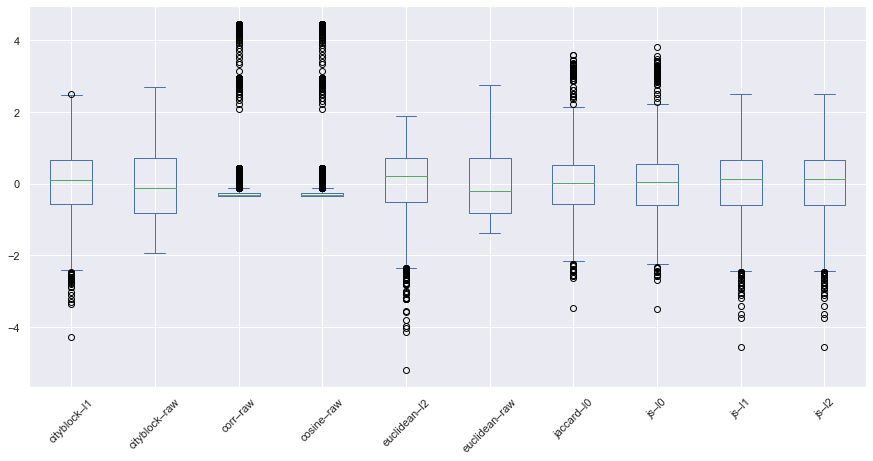

In [87]:
ZPAIRS.T.sort_index().T.plot.box(rot=45, figsize=(15,7));

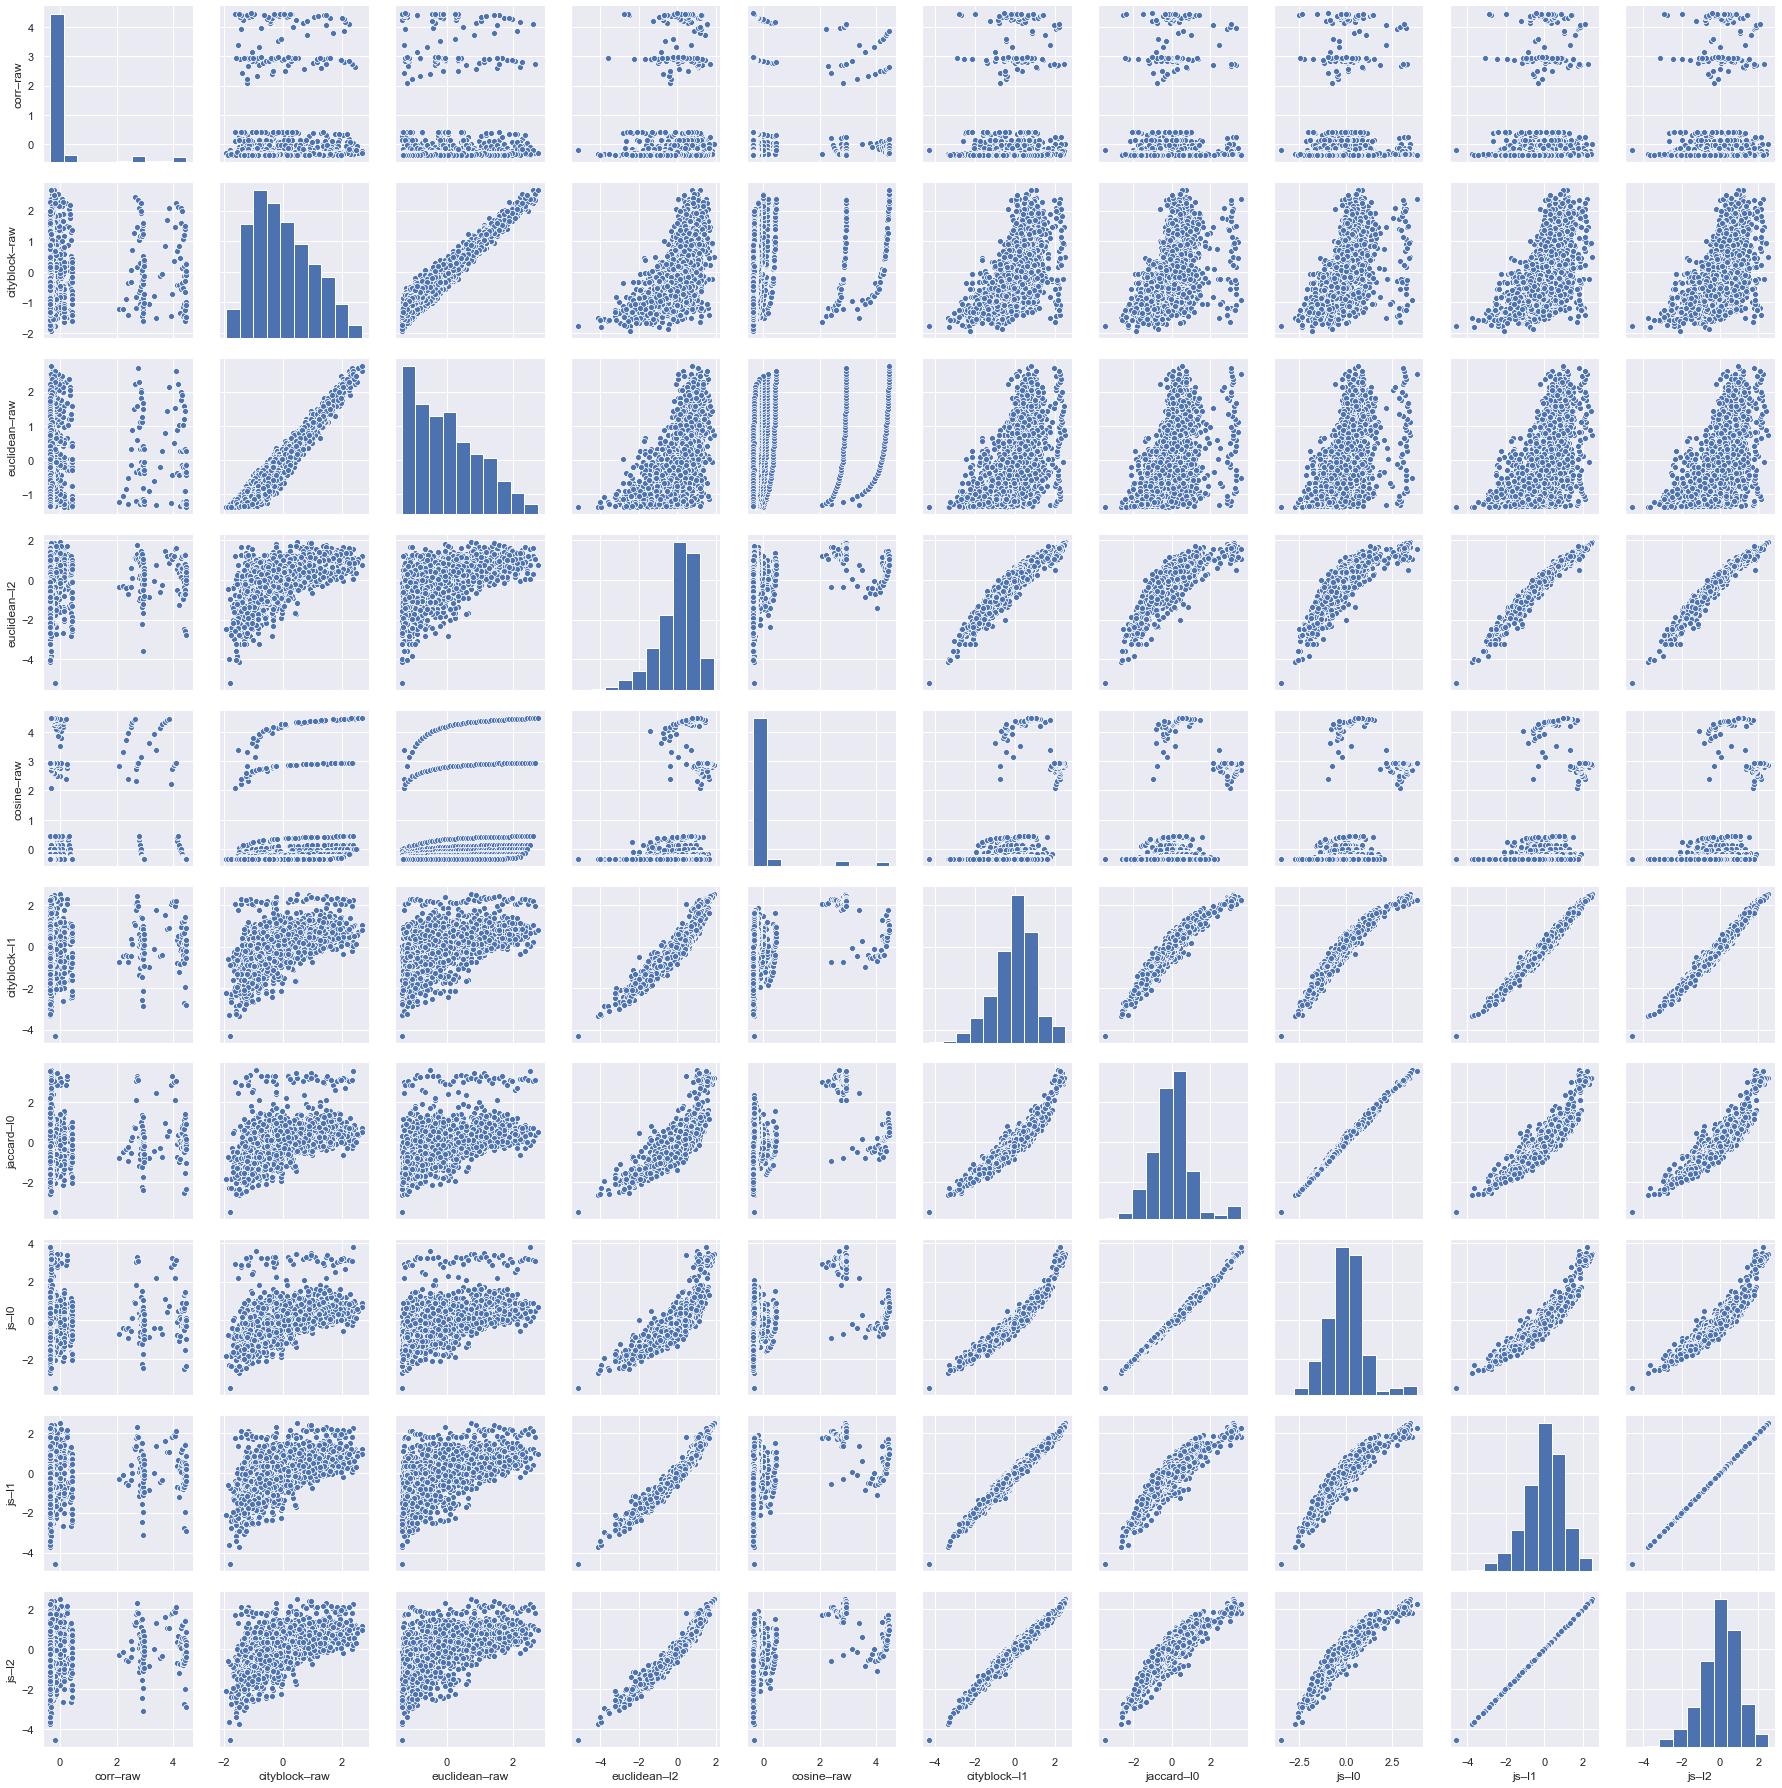

In [88]:
sns.pairplot(ZPAIRS)

In [89]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [90]:
def hca(sims, title="My Dendrogram", linkage_method='weighted', color_thresh=None, figsize=(7, 7)):

    tree = sch.linkage(sims, method=linkage_method)
    labels = DOC.label.values
    if not color_thresh:
        color_thresh = pd.DataFrame(tree)[2].median()
    
    plt.figure()
    fig, axes = plt.subplots(figsize=(20,20))
    dendrogram = sch.dendrogram(tree, 
                                labels=labels, 
                                orientation="left", 
                                count_sort=True,
                                distance_sort=True,
                                above_threshold_color='.75',
                                color_threshold=color_thresh
                               )
    plt.tick_params(axis='both', which='major', labelsize=14)
    fig.suptitle(title, fontsize=20)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

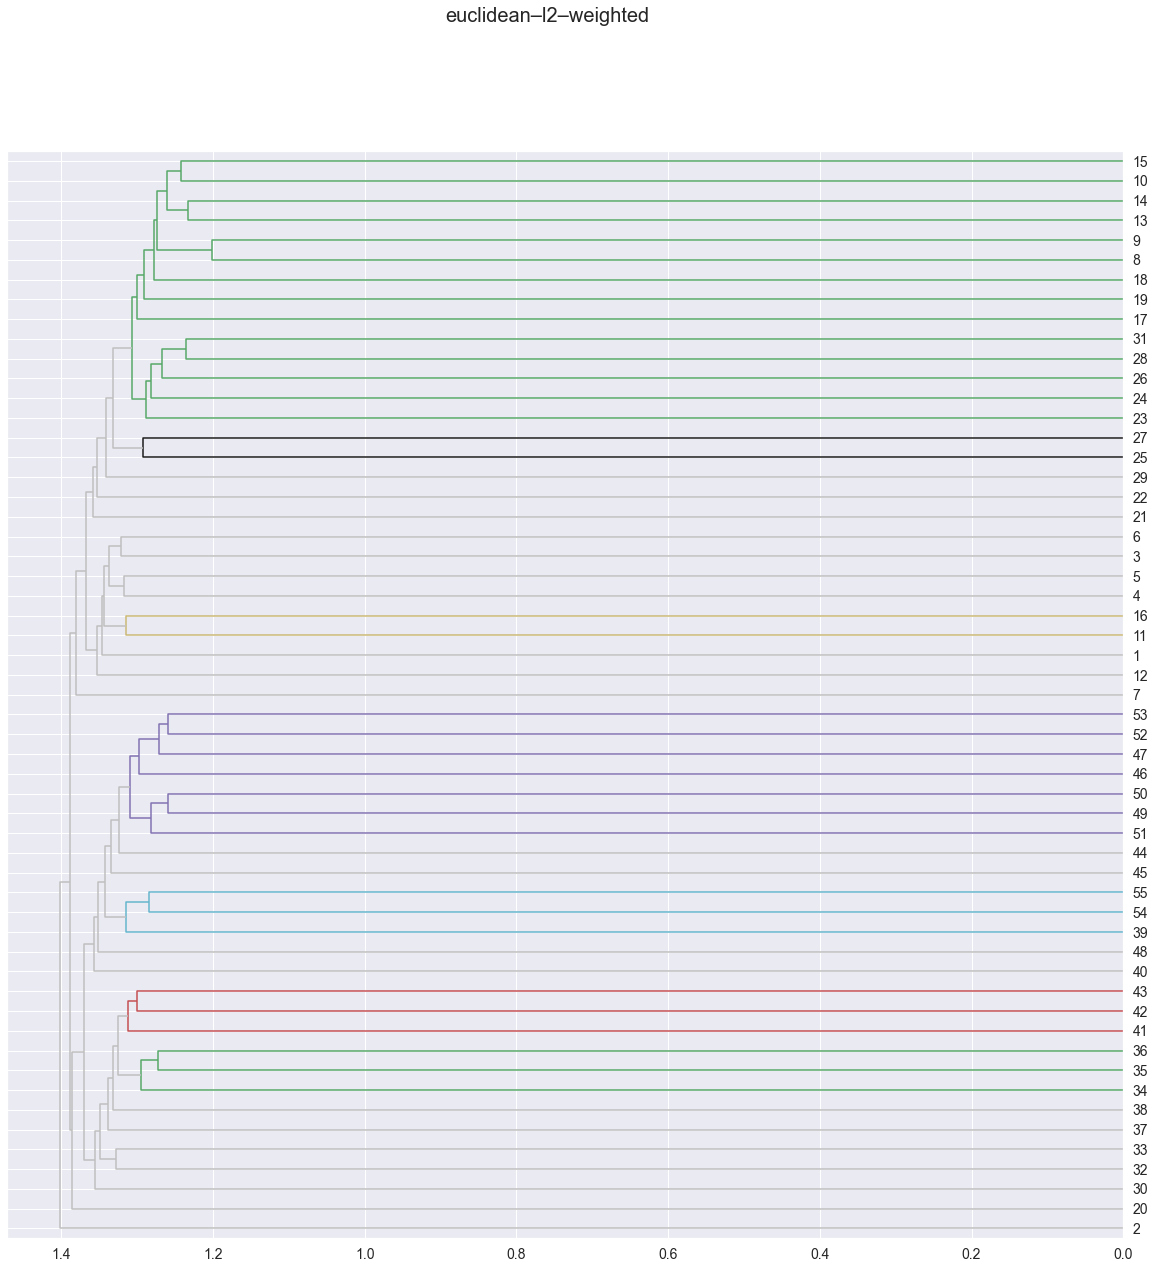

<Figure size 432x288 with 0 Axes>

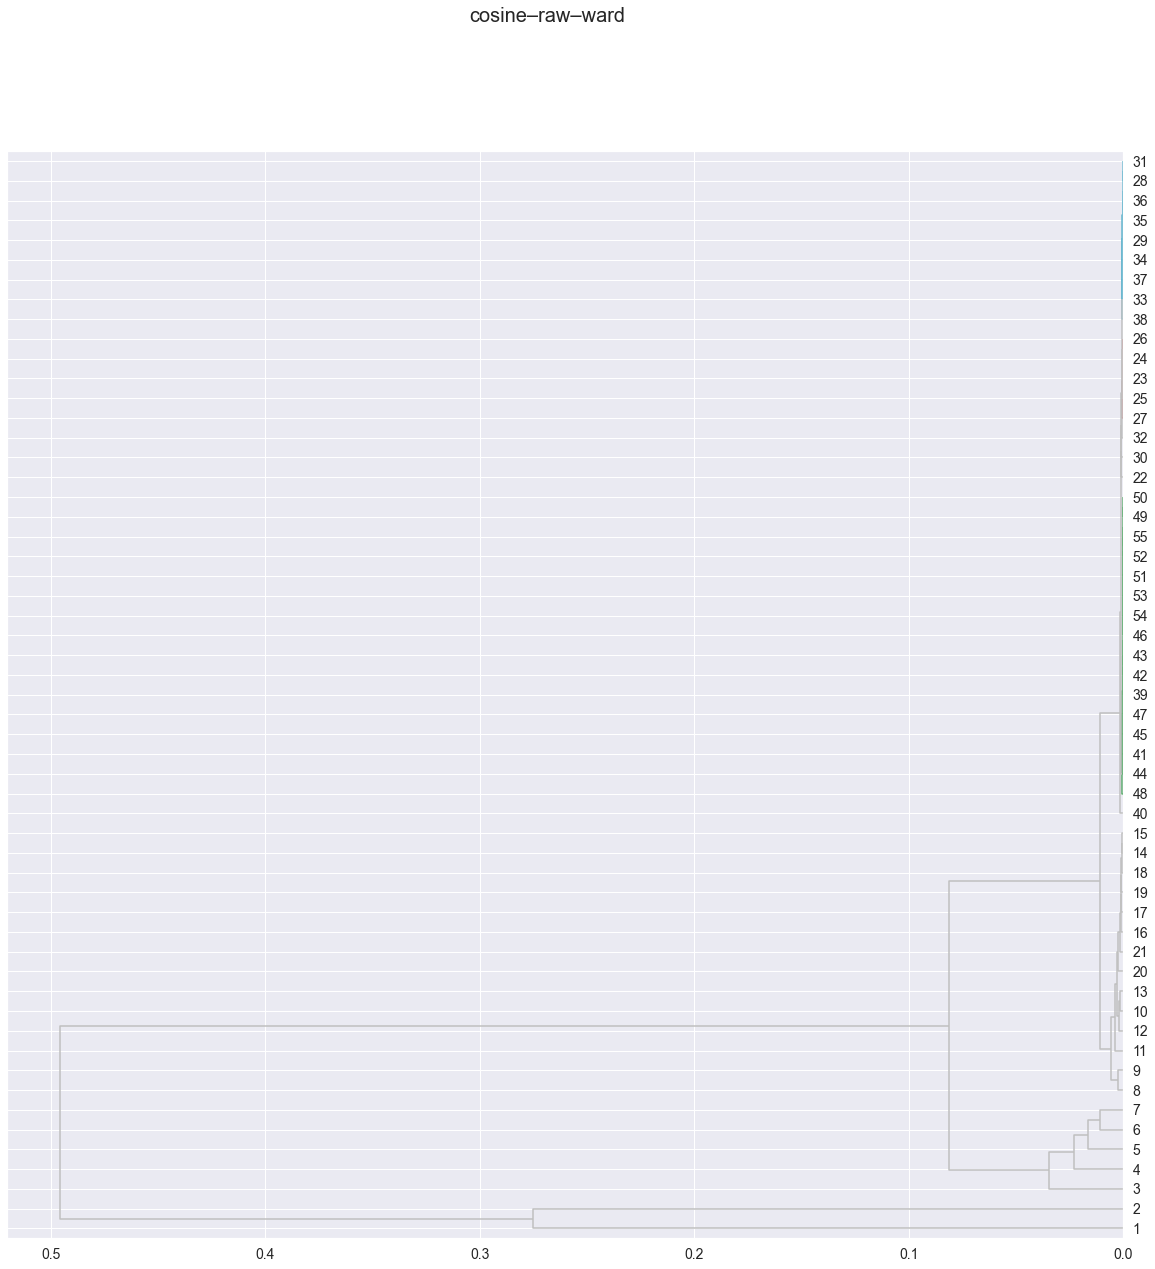

<Figure size 432x288 with 0 Axes>

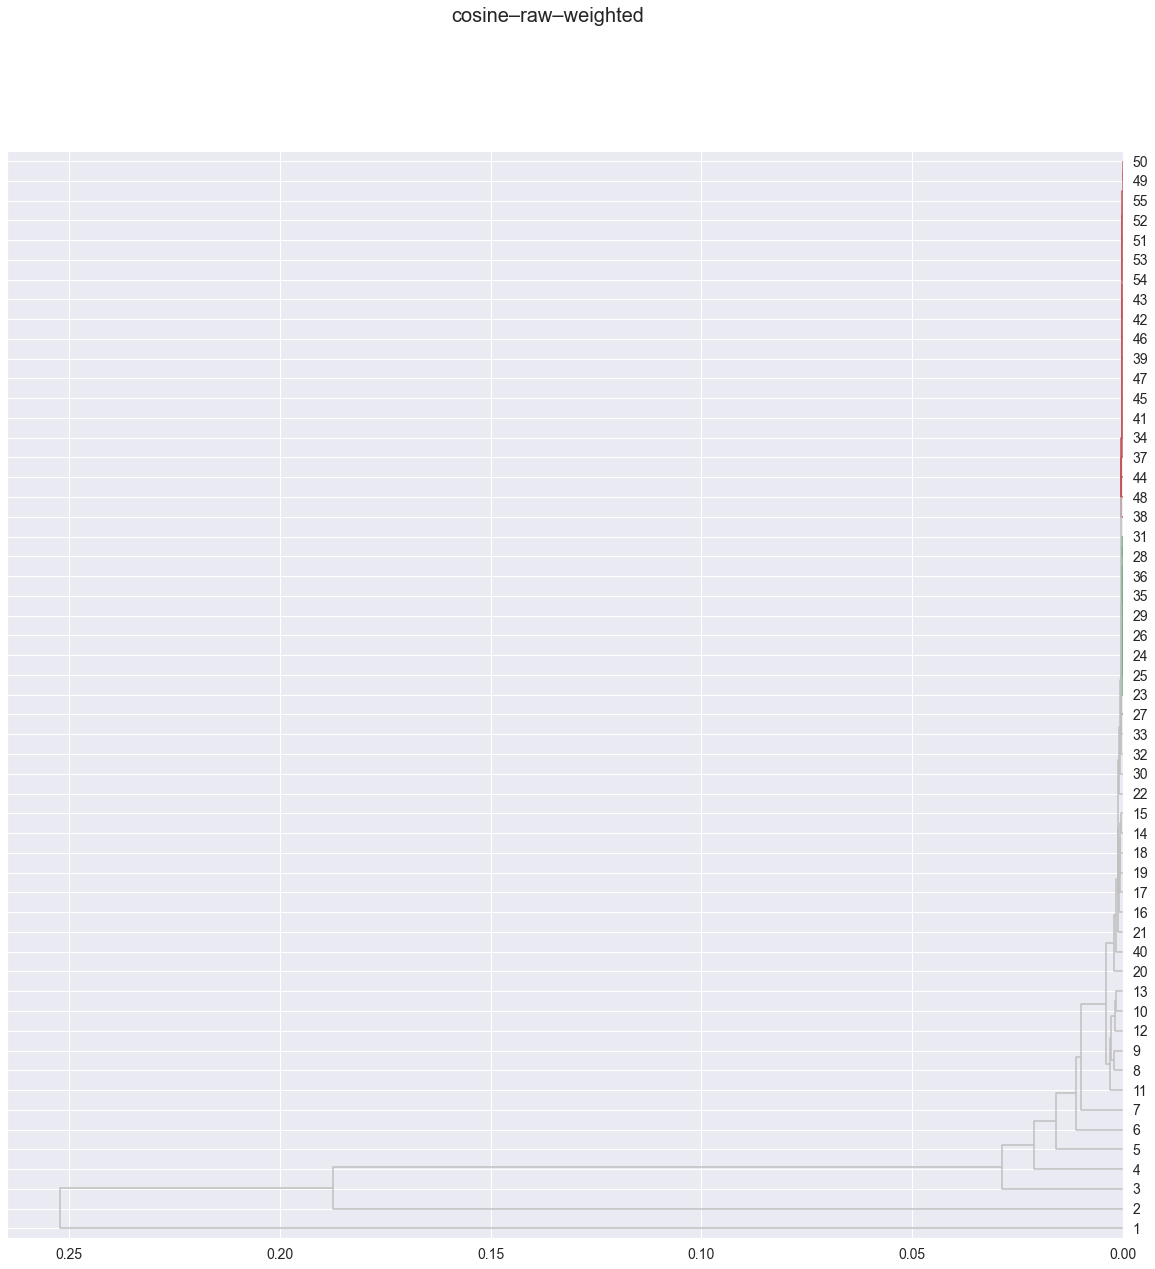

<Figure size 432x288 with 0 Axes>

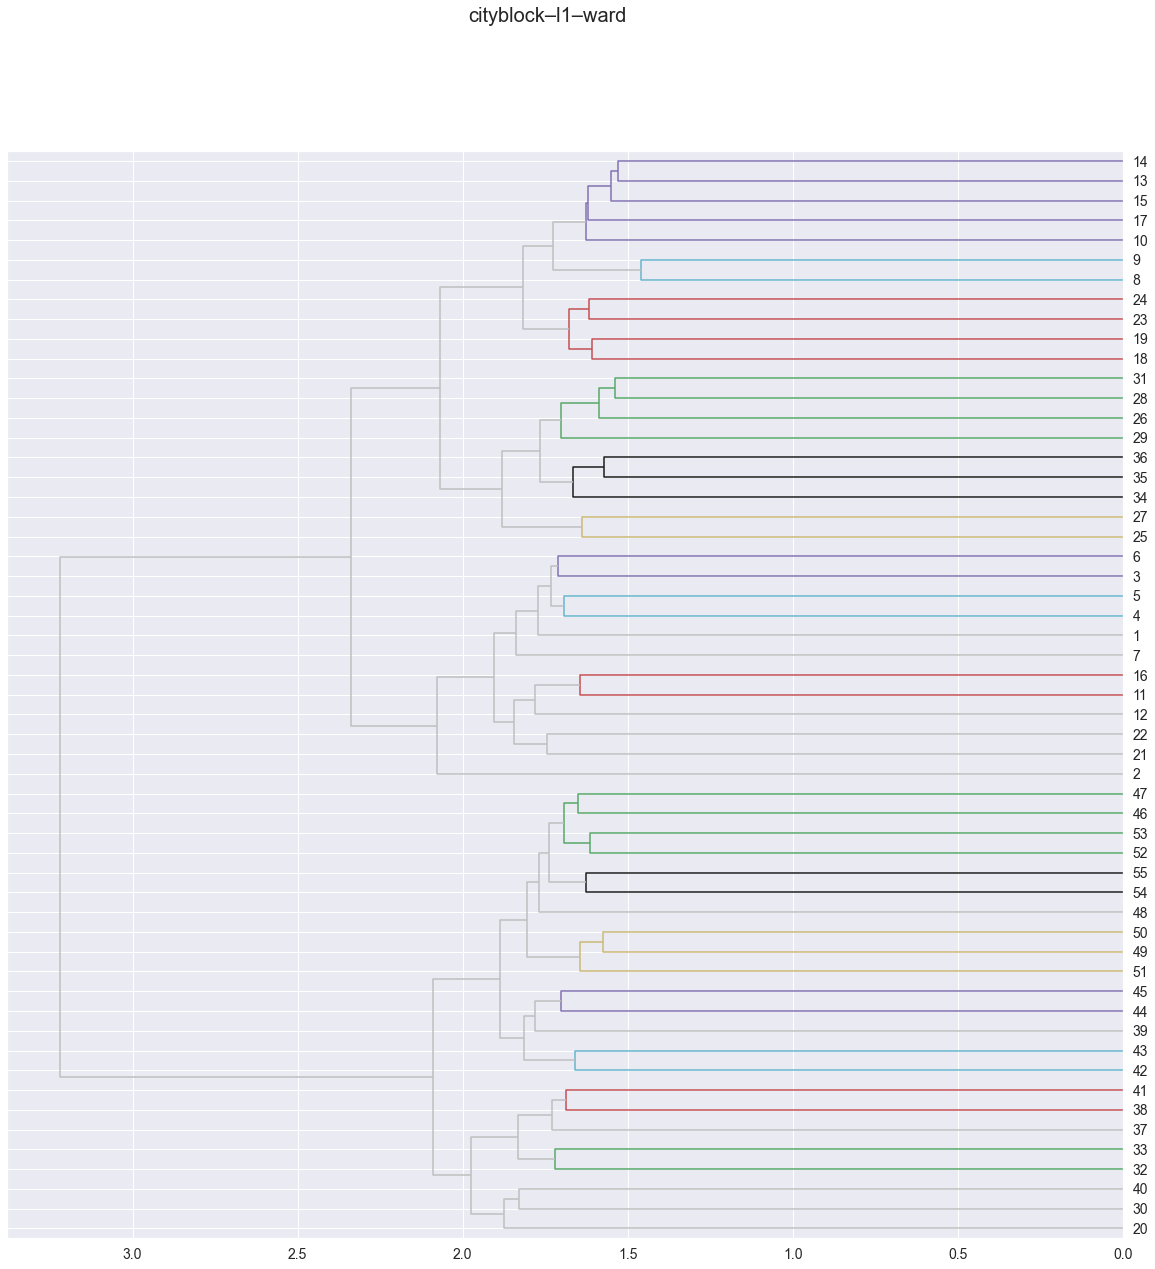

<Figure size 432x288 with 0 Axes>

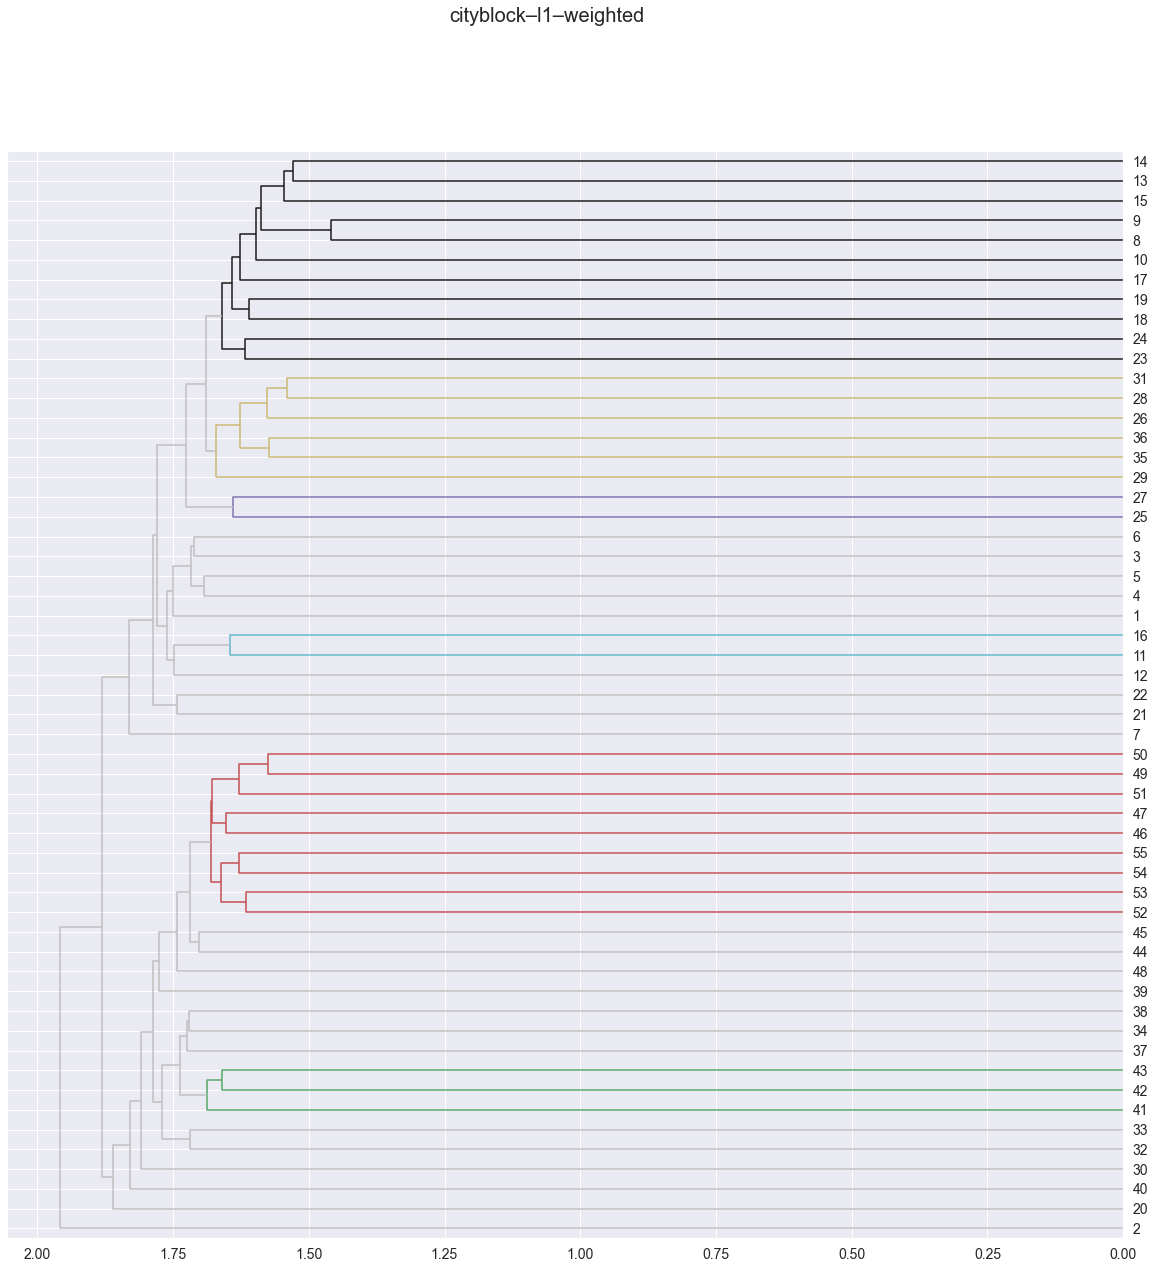

<Figure size 432x288 with 0 Axes>

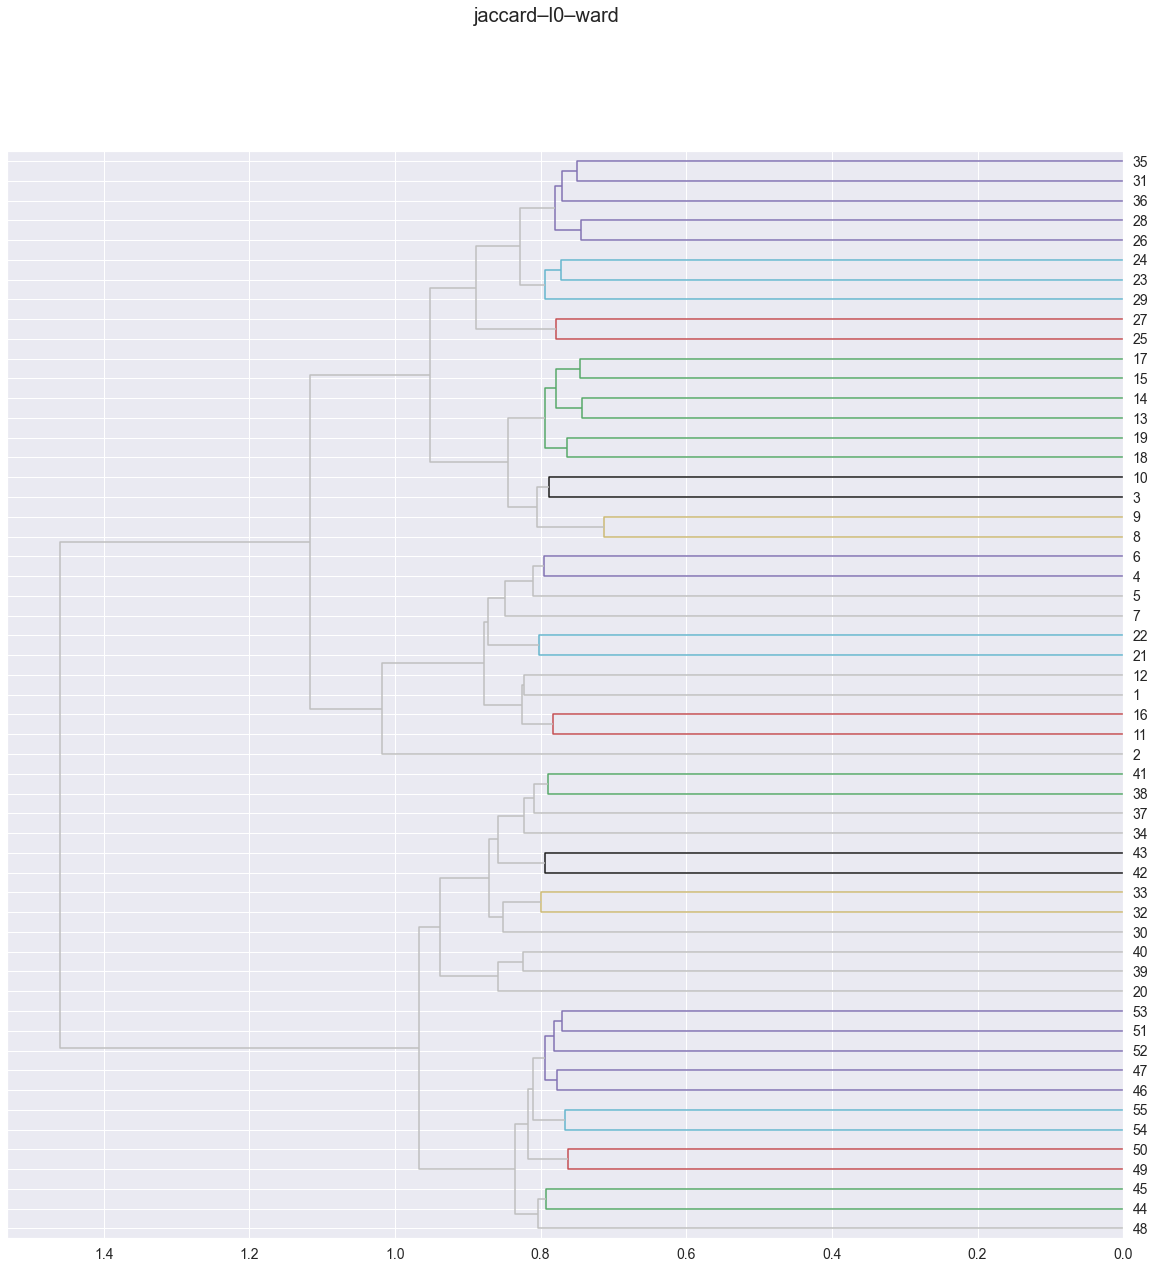

<Figure size 432x288 with 0 Axes>

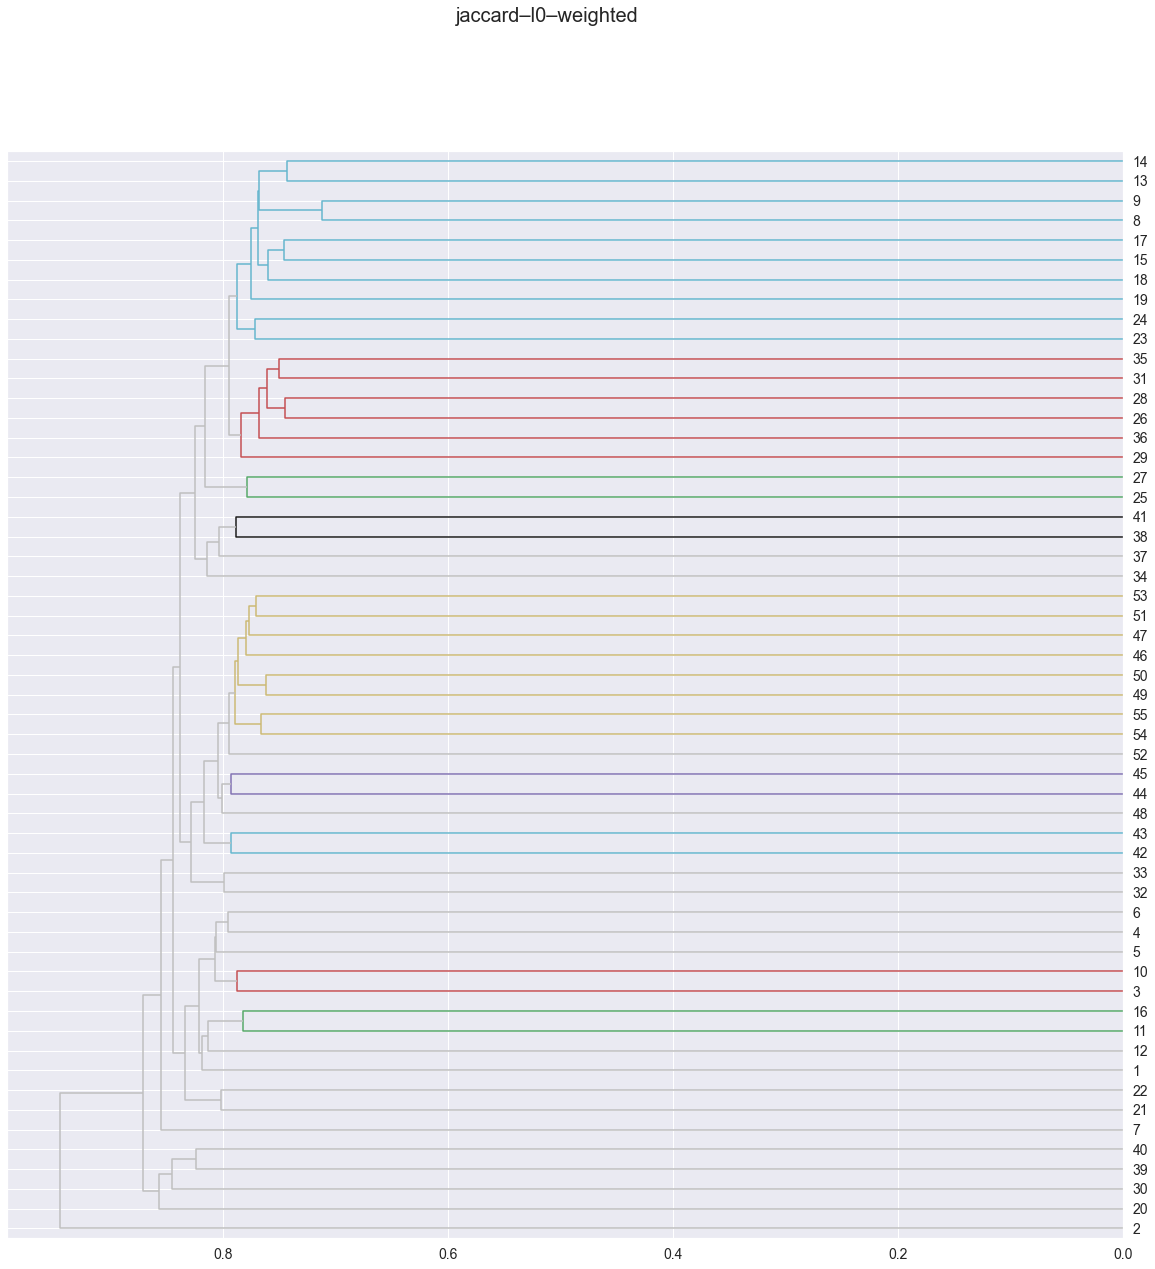

<Figure size 432x288 with 0 Axes>

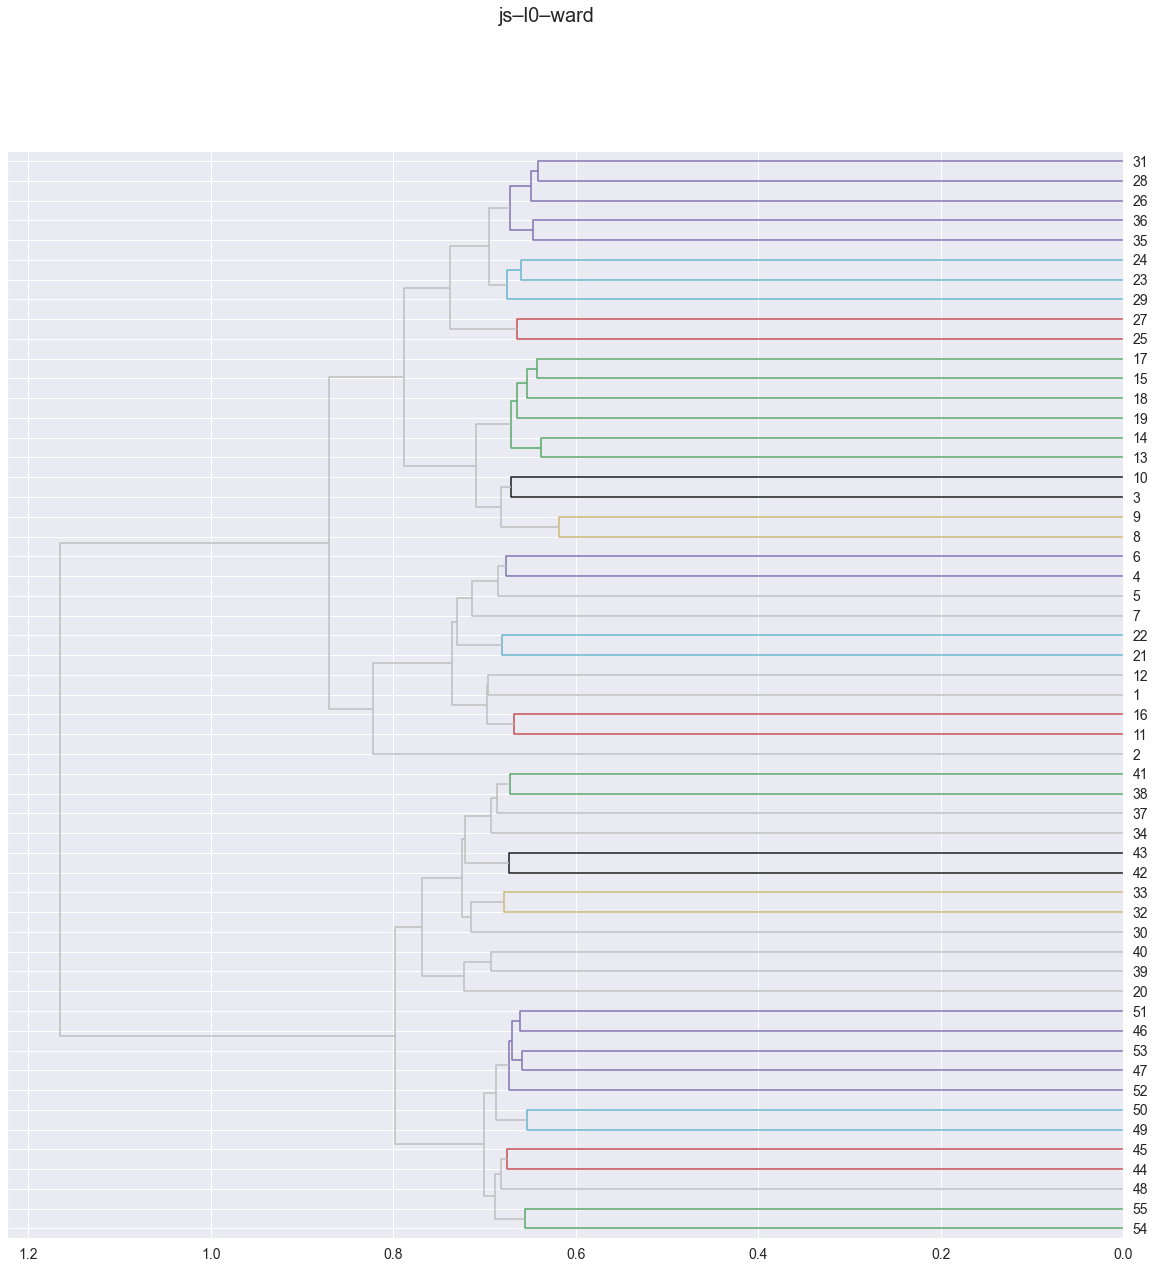

<Figure size 432x288 with 0 Axes>

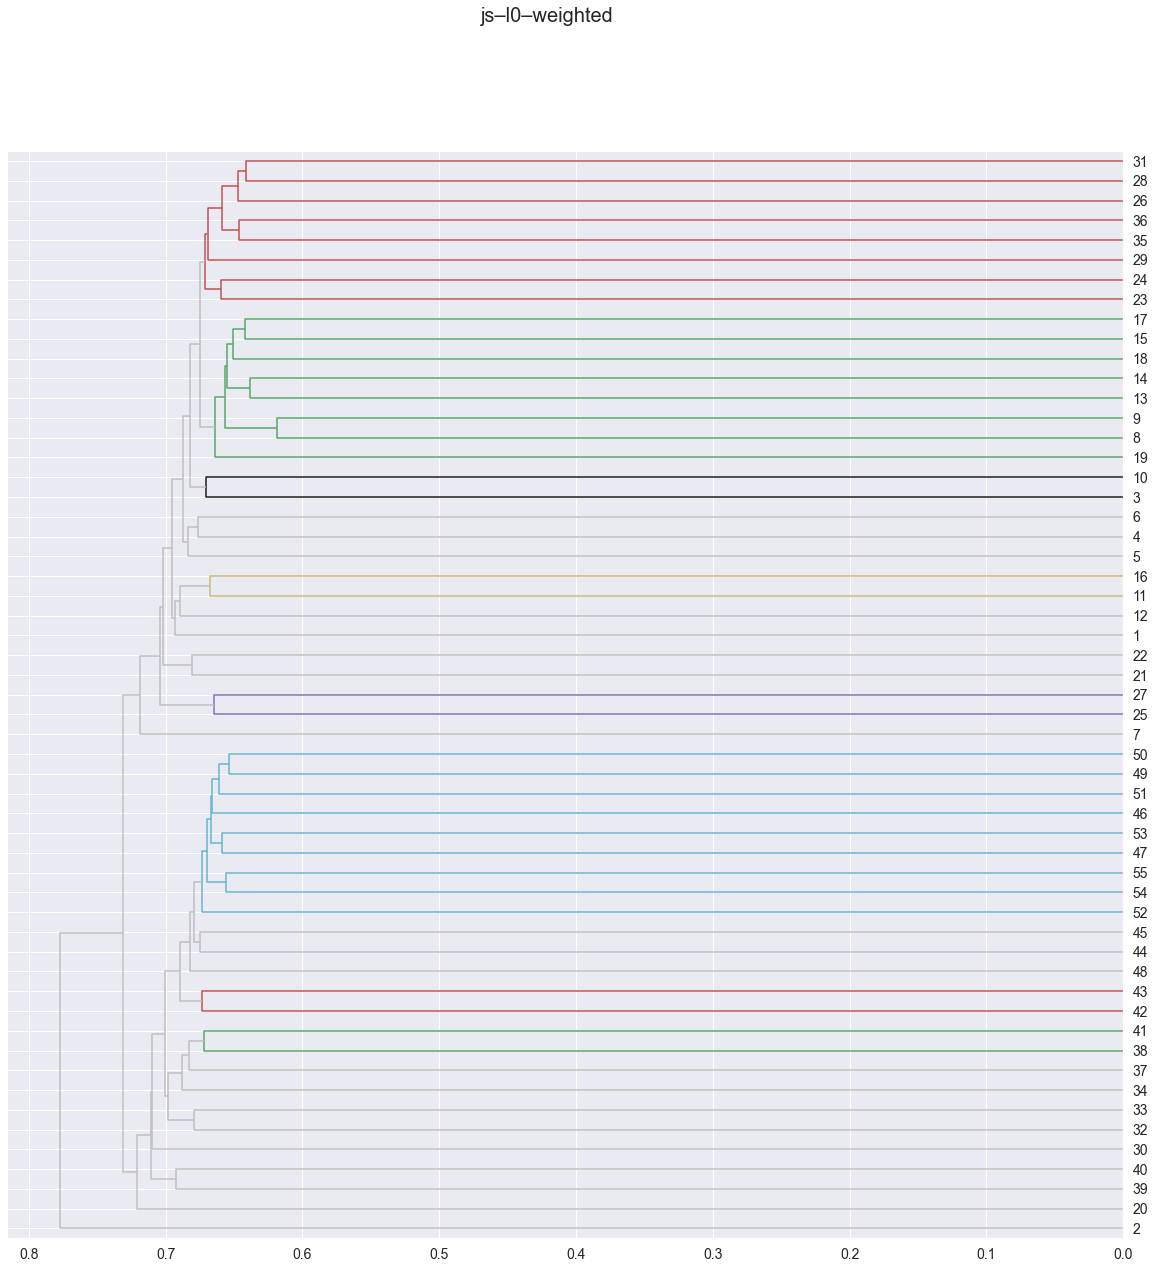

<Figure size 432x288 with 0 Axes>

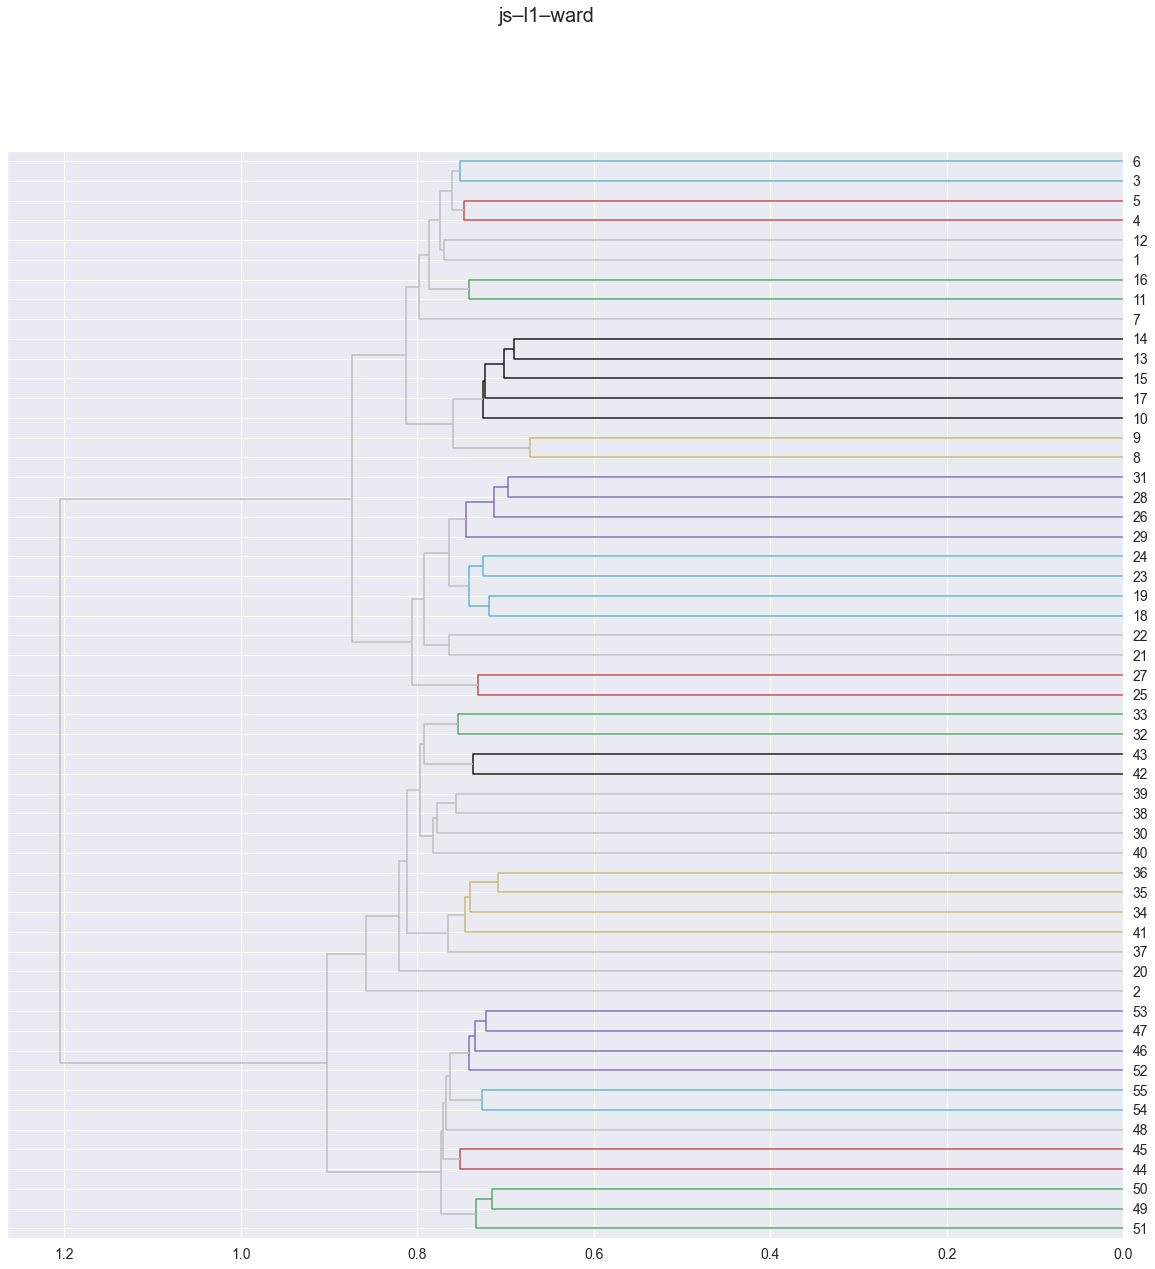

<Figure size 432x288 with 0 Axes>

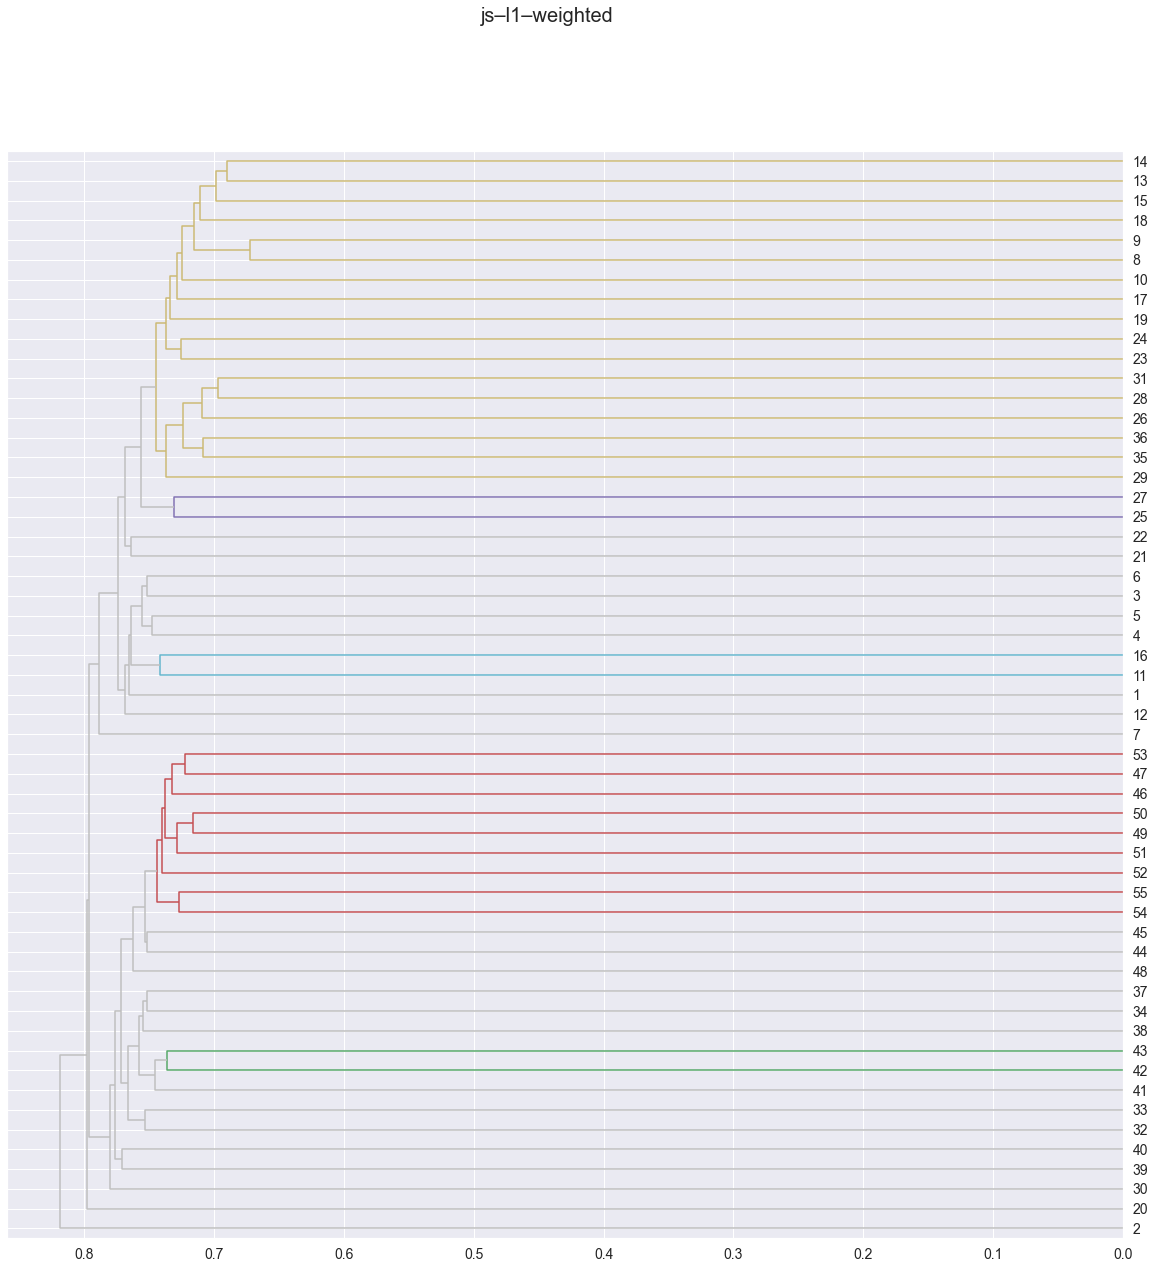

<Figure size 432x288 with 0 Axes>

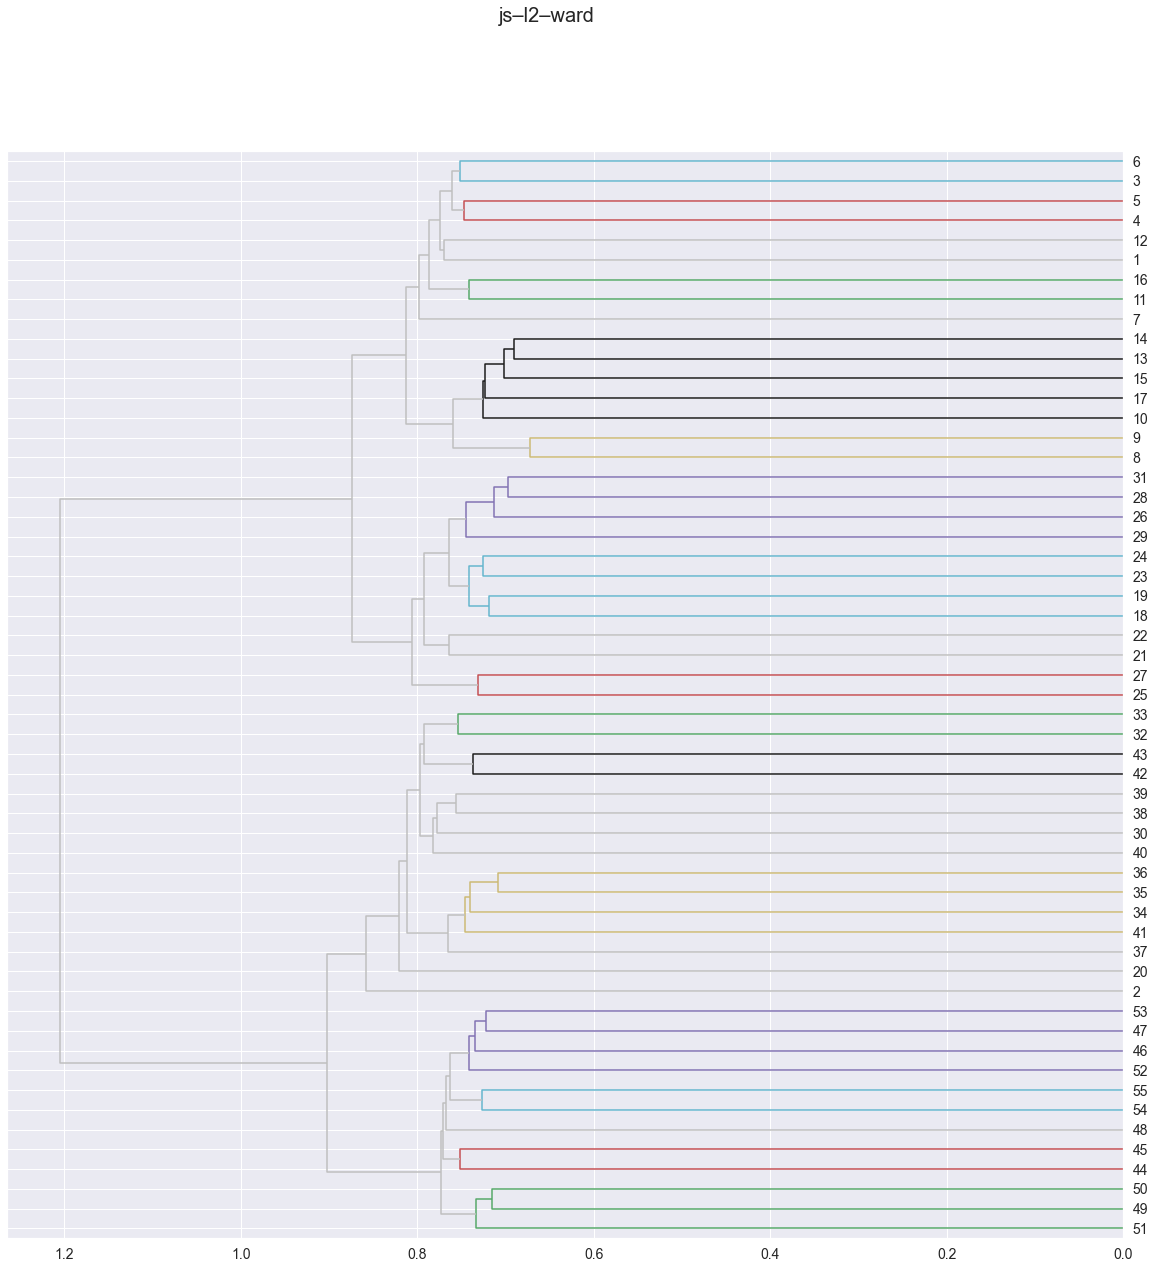

<Figure size 432x288 with 0 Axes>

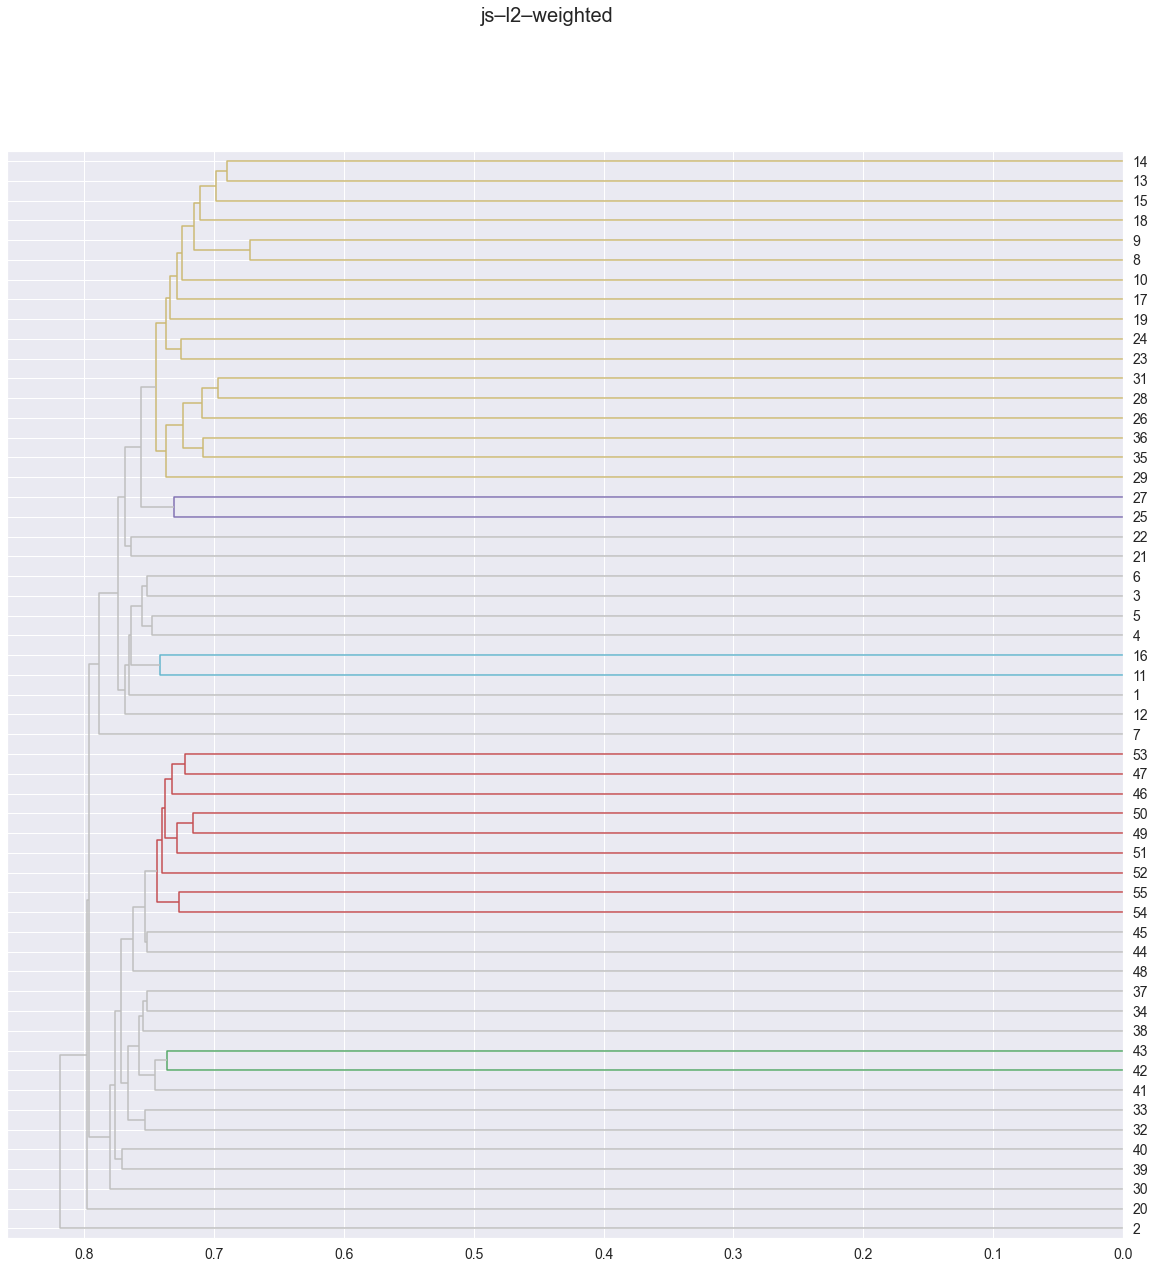

In [91]:
for combo in combos:
    m = combo[-1]
    for l in ['ward','weighted']:
        title = f"{m}–{l}"
        hca(PAIRS[m], title, linkage_method=l)

In [92]:
#mean TFIDF, most significant book
BOW.groupby(CHAPS).mean().sort_values('tfidf', ascending = False)

n     tfidf
book_num chap_num                    
1        2         1.516129  0.099717
         40        2.295455  0.071836
         20        2.217647  0.041882
         48        2.626000  0.039095
         30        2.693299  0.036708
         44        2.753247  0.033320
         47        3.786693  0.030462
         45        3.024436  0.029897
         21        2.528662  0.029895
         32        2.868463  0.028889
         38        2.729651  0.028519
         7         2.426386  0.027312
         33        3.017045  0.027167
         11        2.342574  0.026039
         54        2.898305  0.025709
         53        3.217753  0.024955
         46        3.229577  0.024439
         39        2.929577  0.024014
         1         2.510033  0.023771
         37        2.757363  0.023618
         22        2.697543  0.023581
         43        3.069374  0.023426
         12        2.567850  0.023269
         41        3.210456  0.023046
         6         2.338403  0.022746
         16        2.370370  0.022306
         55        3.078404  0.022034
         52        2.847154  0.021940
         5         2.956354  0.021490
         4         2.727941  0.020755
         51        3.359146  0.020651
         27        2.602757  0.019812
         42        3.047564  0.019753
         50        3.191024  0.019719
         49        3.113609  0.019066
         34        3.187500  0.016949
         3         3.161654  0.015397
         25        2.711214  0.015235
         19        3.777778  0.014703
         29        2.847561  0.014598
         17        3.143622  0.014413
         13        3.193805  0.014049
         35        3.646907  0.013923
         18        3.322905  0.013365
         23        3.262052  0.012797
         8         3.599391  0.012377
         36        3.749274  0.012304
         9         3.925497  0.011150
         26        3.486631  0.010921
         10        3.150259  0.010659
         24        3.157303  0.010457
         28        3.541632  0.010279
         15        3.953360  0.009993
         31        4.099275  0.009491
         14        4.900717  0.006060

In [93]:
from sklearn.cluster import KMeans

In [94]:
# n_clusters = 2
n_clusters = 4
# n_clusters = 5

In [95]:
km = KMeans(n_clusters)
DOC['y_raw'] = km.fit_predict(TFIDF)
DOC['y_L0'] = km.fit_predict(L0)
DOC['y_L1'] = km.fit_predict(L1)
DOC['y_L2'] = km.fit_predict(L2)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`n

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:445: DeprecationWarning:

`

/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:445: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-note

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning:

`n

In [96]:
DOC.iloc[:,1:].sort_values('label').style.background_gradient(cmap='YlGn')

In [97]:
DOC

book_num  chap_num                                         Title   Author  \
0          1         1  United States presidents' Inaugural Speeches  Various   
1          1         2  United States presidents' Inaugural Speeches  Various   
2          1         3  United States presidents' Inaugural Speeches  Various   
3          1         4  United States presidents' Inaugural Speeches  Various   
4          1         5  United States presidents' Inaugural Speeches  Various   
5          1         6  United States presidents' Inaugural Speeches  Various   
6          1         7  United States presidents' Inaugural Speeches  Various   
7          1         8  United States presidents' Inaugural Speeches  Various   
8          1         9  United States presidents' Inaugural Speeches  Various   
9          1        10  United States presidents' Inaugural Speeches  Various   
10         1        11  United States presidents' Inaugural Speeches  Various   
11         1        12  United States presidents' Inaugural Speeches  Various   
12         1        13  United States presidents' Inaugural Speeches  Various   
13         1        14  United States presidents' Inaugural Speeches  Various   
14         1        15  United States presidents' Inaugural Speeches  Various   
15         1        16  United States presidents' Inaugural Speeches  Various   
16         1        17  United States presidents' Inaugural Speeches  Various   
17         1        18  United States presidents' Inaugural Speeches  Various   
18         1        19  United States presidents' Inaugural Speeches  Various   
19         1        20  United States presidents' Inaugural Speeches  Various   
20         1        21  United States presidents' Inaugural Speeches  Various   
21         1        22  United States presidents' Inaugural Speeches  Various   
22         1        23  United States presidents' Inaugural Speeches  Various   
23         1        24  United States presidents' Inaugural Speeches  Various   
24         1        25  United States presidents' Inaugural Speeches  Various   
25         1        26  United States presidents' Inaugural Speeches  Various   
26         1        27  United States presidents' Inaugural Speeches  Various   
27         1        28  United States presidents' Inaugural Speeches  Various   
28         1        29  United States presidents' Inaugural Speeches  Various   
29         1        30  United States presidents' Inaugural Speeches  Various   
30         1        31  United States presidents' Inaugural Speeches  Various   
31         1        32  United States presidents' Inaugural Speeches  Various   
32         1        33  United States presidents' Inaugural Speeches  Various   
33         1        34  United States presidents' Inaugural Speeches  Various   
34         1        35  United States presidents' Inaugural Speeches  Various   
35         1        36  United States presidents' Inaugural Speeches  Various   
36         1        37  United States presidents' Inaugural Speeches  Various   
37         1        38  United States presidents' Inaugural Speeches  Various   
38         1        39  United States presidents' Inaugural Speeches  Various   
39         1        40  United States presidents' Inaugural Speeches  Various   
40         1        41  United States presidents' Inaugural Speeches  Various   
41         1        42  United States presidents' Inaugural Speeches  Various   
42         1        43  United States presidents' Inaugural Speeches  Various   
43         1        44  United States presidents' Inaugural Speeches  Various   
44         1        45  United States presidents' Inaugural Speeches  Various   
45         1        46  United States presidents' Inaugural Speeches  Various   
46         1        47  United States presidents' Inaugural Speeches  Various   
47         1        48  United States presidents' Inaugural Speeches  Various   
48         1        49  United Stat

In [98]:
from scipy.linalg import norm
max_terms = 1000
tf_method = 'max'
global_term_sig = 'dfidf'
n_comps = 10
center_by_mean=False
center_by_variance=False
norm_docs = True # L2 norming
k=6

In [99]:
if norm_docs:
    print("L2 norming")
    TFIDF = TFIDF.apply(lambda x: x / norm(x), 1).fillna(0) # Euclidean norming

L2 norming


In [100]:
COV = TFIDF.cov()

In [101]:
COV

term_str       book_num      chap_num             $             '  \
term_str                                                            
book_num   1.102546e-02 -5.723052e-03  1.003605e-06 -1.901970e-06   
chap_num  -5.723052e-03  3.547289e-03  6.708759e-07  8.216836e-07   
$          1.003605e-06  6.708759e-07  1.292236e-07 -3.686580e-09   
'         -1.901970e-06  8.216836e-07 -3.686580e-09  4.936740e-08   
'll       -6.420417e-07  1.845273e-07 -7.767263e-10  3.954546e-09   
...                 ...           ...           ...           ...   
youthful   2.417975e-06  3.094796e-07 -3.131381e-09 -2.686702e-09   
zeal       6.151259e-05 -7.919253e-06 -3.267832e-08 -2.803776e-08   
zealous    2.611288e-06  1.219233e-06  4.203651e-08 -7.222734e-09   
zealously  8.394360e-06  6.829196e-07  3.513386e-08 -8.341918e-09   
zone       2.417975e-06  3.094796e-07 -3.131381e-09 -2.686702e-09   

term_str            'll            's             (             )  \
term_str                                                            
book_num  -6.420417e-07 -3.822634e-07  5.476322e-04  5.476322e-04   
chap_num   1.845273e-07  2.413462e-06 -3.973458e-04 -3.973458e-04   
$         -7.767263e-10 -1.538322e-08 -7.747347e-08 -7.747347e-08   
'          3.954546e-09 -4.258243e-09 -9.411887e-08 -9.411887e-08   
'll        7.582101e-09  3.421505e-10 -1.720396e-08 -1.720396e-08   
...                 ...           ...           ...           ...   
youthful  -5.660616e-10 -1.731620e-08 -8.260232e-08 -8.260232e-08   
zeal      -5.907280e-09  3.424059e-07 -5.569076e-07 -5.569076e-07   
zealous   -1.521759e-09 -4.357007e-08 -2.072768e-07 -2.072768e-07   
zealously -2.076071e-09 -5.966987e-08 -2.747557e-07 -2.747557e-07   
zone      -5.660616e-10 -1.731620e-08 -8.260232e-08 -8.260232e-08   

term_str          *all*        *down*  ...          your         yours  \
term_str                               ...                               
book_num  -8.064038e-07 -8.064038e-07  ...  6.617510e-04 -3.415718e-06   
chap_num   2.289186e-07  2.289186e-07  ... -4.145290e-04  1.479278e-06   
$         -9.618012e-10 -9.618012e-10  ... -1.290031e-07 -6.541978e-09   
'         -8.252183e-10 -8.252183e-10  ... -7.558803e-08 -5.612969e-09   
'll       -1.738654e-10 -1.738654e-10  ... -2.208656e-08 -1.182597e-09   
...                 ...           ...  ...           ...           ...   
youthful  -7.009403e-10 -7.009403e-10  ... -9.401475e-08 -4.767655e-09   
zeal      -7.314841e-09 -7.314841e-09  ...  1.336993e-06 -8.663548e-09   
zealous   -1.884357e-09 -1.884357e-09  ... -2.527425e-07 -1.281702e-08   
zealously -2.570748e-09 -2.570748e-09  ... -3.426918e-07 -1.748571e-08   
zone      -7.009403e-10 -7.009403e-10  ... -9.401475e-08 -4.767655e-09   

term_str       yourself    yourselves         youth      youthful  \
term_str                                                            
book_num  -7.660860e-07 -2.272385e-07 -2.074756e-06  2.417975e-06   
chap_num   2.136030e-07  1.054228e-06  6.206501e-07  3.094796e-07   
$         -8.964562e-10 -5.765186e-09 -2.627379e-09 -3.131381e-09   
'          5.386236e-09 -4.946487e-09  1.099858e-09 -2.686702e-09   
'll       -1.620529e-10 -1.042176e-09  5.130428e-09 -5.660616e-10   
...                 ...           ...           ...           ...   
youthful  -6.533183e-10 -4.201545e-09 -1.914778e-09  1.232325e-07   
zeal      -6.817870e-09 -4.384630e-08 -1.998215e-08  3.656868e-08   
zealous   -1.756334e-09 -1.129513e-08 -5.147551e-09  6.897005e-08   
zealously -2.396091e-09 -1.540946e-08 -5.042889e-09 -8.369703e-09   
zone      -6.533183e-10 -4.201545e-09 -1.914778e-09  1.232325e-07   

term_str           zeal       zealous     zealously          zone  
term_str                                                           
book_num   6.151259e-05  2.611288e-06  8.394360e-06  2.417975e-06  
chap_num  -7.919253e-06  1.219233e-06  6.829196e-07  3.094796e-07  
$         -3.267832e-08  4.203651e-08  3.513386e-08 -3.131381e-09  
'  

In [102]:
from scipy.linalg import eigh

In [103]:
EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
EIG_VAL.index.name = 'term_str'

CPU times: user 3min 7s, sys: 2.95 s, total: 3min 10s
Wall time: 52.2 s


In [104]:
EIG_VEC.iloc[:10, :10].style.background_gradient(cmap='YlGn', high=.5)

In [105]:
EIG_PAIRS = EIG_VAL.join(EIG_VEC.T)

In [106]:
#EIG_PAIRS.head()

In [107]:
EIG_PAIRS['exp_var'] = np.round((EIG_PAIRS.eig_val / EIG_PAIRS.eig_val.sum()) * 100, 2)

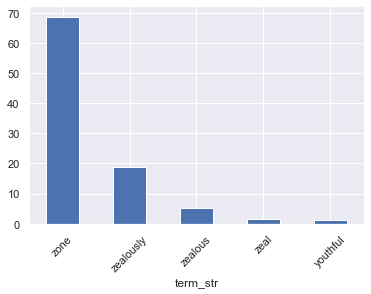

In [108]:
EIG_PAIRS.exp_var.sort_values(ascending=False).head().plot.bar(rot=45)

In [109]:
COMPS = EIG_PAIRS.sort_values('exp_var', ascending=False).head(10).reset_index(drop=True)
COMPS.index.name = 'comp_id'
COMPS.index = ["PC{}".format(i) for i in COMPS.index.tolist()]
COMPS.index.name = 'pc_id'

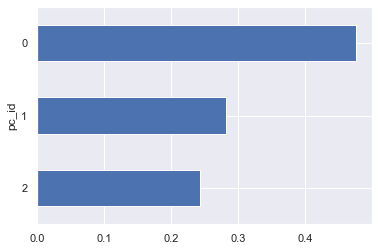

In [110]:
COMPINF.exp_var.sort_values().plot.barh();

In [111]:
LOADINGS = COMPS[COV.index].T
LOADINGS.index.name = 'term_str'

In [112]:
LOADINGS.head(10).style.background_gradient(cmap='YlGn', high=.5)

In [113]:
top_terms = {}
for i in [0, 1, 2, 3]:
    for j in [0, 1]:
        top_terms[f"{i}{j}"] = ' '.join(LOADINGS.sort_values(f'PC{i}', ascending=bool(j)).head(10).index.to_list())
top_terms

{'00': 'book_num arrive upbraidings besides violated incurring willingly knowingly injunctions previous',
 '01': 'chap_num today democracy americans learned peoples help mr century economic',
 '10': 'upbraidings arrive willingly violated incurring previous witnesses injunctions knowingly thereof',
 '11': 'book_num impressions immutable providential qualifications peculiarly rendered deliberations article pecuniary',
 '20': 'book_num chap_num pleasing houses legislatures virtuous amiable habitual commanded choice',
 '21': 'providential immutable impressions qualifications besides peculiarly retreat pecuniary official article',
 '30': 'thousandth retire moments trusted intolerance fellow-citizens safety principle him your',
 '31': 'pleasing houses legislatures virtuous amiable habitual anything legislature preference esteem'}

In [114]:
DCM = TFIDF.dot(COMPS[COV.index].T) 
DCM.to_csv("DCM.csv")

In [115]:
DCM

pc_id       PC0       PC1       PC2       PC3       PC4       PC5       PC6  \
0      0.375758 -0.295163  0.262679  0.048527  0.055338  0.120105  0.058020   
1      0.125935  0.398377  0.348884  0.049162  0.055499  0.121912  0.058800   
2     -0.153537 -0.086090  0.529114 -0.051473  0.026354  0.096405  0.048137   
3     -0.221921 -0.073957  0.481765  0.157228 -0.007616  0.102008  0.049519   
4     -0.264859 -0.064134  0.452990  0.081783  0.169922  0.089483  0.048887   
5     -0.295742 -0.061480  0.427922  0.053548  0.064410  0.167920  0.142763   
6     -0.316325 -0.056008  0.413858  0.052330  0.067172  0.211290  0.004345   
7     -0.332810 -0.053046  0.402895  0.049944  0.059966  0.131067  0.063559   
8     -0.344594 -0.050155  0.396598  0.049763  0.060003  0.129996  0.061822   
9     -0.354303 -0.048289  0.391058  0.049585  0.057676  0.126384  0.062499   
10    -0.360098 -0.047347  0.386973  0.048313  0.058938  0.125575  0.063650   
11    -0.367472 -0.046115  0.382775  0.049561  0.056612  0.124125  0.061082   
12    -0.372298 -0.044734  0.380478  0.049714  0.056931  0.124515  0.061059   
13    -0.378008 -0.043663  0.377030  0.048554  0.056225  0.123369  0.059678   
14    -0.381656 -0.042743  0.375224  0.049367  0.057330  0.122916  0.059495   
15    -0.384696 -0.041903  0.372356  0.048282  0.055463  0.123376  0.059819   
16    -0.387764 -0.041908  0.370967  0.049528  0.055220  0.122580  0.059704   
17    -0.390718 -0.040800  0.369566  0.048534  0.055188  0.121698  0.058881   
18    -0.392840 -0.040070  0.368255  0.049342  0.054813  0.121309  0.058837   
19    -0.395282 -0.040171  0.366308  0.048253  0.055226  0.121309  0.058191   
20    -0.396978 -0.038917  0.365588  0.048168  0.055657  0.120597  0.058798   
21    -0.399148 -0.039400  0.364813  0.048394  0.054912  0.120825  0.058455   
22    -0.400871 -0.039092  0.363608  0.047950  0.054742  0.120727  0.058514   
23    -0.402548 -0.038232  0.362886  0.047854  0.054561  0.120789  0.058483   
24    -0.403592 -0.038055  0.361522  0.048121  0.054829  0.120185  0.058400   
25    -0.404918 -0.037909  0.361374  0.047470  0.054756  0.120488  0.058325   
26    -0.405904 -0.037656  0.360278  0.048365  0.054542  0.119962  0.058410   
27    -0.407253 -0.037628  0.360033  0.047693  0.054607  0.120391  0.058196   
28    -0.408321 -0.037573  0.359440  0.047663  0.054618  0.120067  0.058027   
29    -0.409266 -0.037322  0.358860  0.047609  0.054602  0.119250  0.057745   
30    -0.409950 -0.037016  0.358061  0.047565  0.054483  0.119862  0.058099   
31    -0.410670 -0.037263  0.357523  0.047808  0.054179  0.118989  0.057665   
32    -0.411269 -0.037163  0.356957  0.048138  0.054452  0.119269  0.058138   
33    -0.412223 -0.036597  0.356841  0.047613  0.054084  0.119513  0.057653   
34    -0.412922 -0.036719  0.356571  0.047819  0.054370  0.119377  0.057770   
35    -0.413698 -0.036404  0.355994  0.047435  0.054154  0.119312  0.057958   
36    -0.414139 -0.036227  0.355430  0.047560  0.054396  0.119020  0.057977   
37    -0.414762 -0.036135  0.355241  0.047664  0.054181  0.119030  0.057412   
38    -0.415443 -0.036097  0.354978  0.047462  0.053649  0.118804  0.057490   
39    -0.415434 -0.035550  0.353975  0.047852  0.053644  0.118053  0.057609   
40    -0.416328 -0.035885  0.354389  0.047573  0.054093  0.118874  0.057678   
41    -0.416489 -0.035173  0.353765  0.047394  0.053760  0.118805  0.057451   
42    -0.417366 -0.035572  0.353846  0.047614  0.054001  0.118694  0.057585   
43    -0.417437 -0.035615  0.353311  0.047926  0.053608  0.118643  0.057083   
44    -0.418024 -0.035425  0.353223  0.047888  0.053906  0.118531  0.057743   
45    -0.418436 -0.035267  0.353057  0.047783  0.053650  0.118427  0.057315   
46    -0.418657 -0.035195  0.352611  0.047507  0.053530  0.118209  0.057518   
47    -0.418919 -0.034888  0.352390  0.047572  0.053873  0.118245  0.057397   
48    -0.419510 -0.035028  0.352302  0.047588  0.053637  0.118444  0.057424   
49    -0.419891 -0.035004  0.352174  0.047471  0.0

# Topic Models

In [116]:
BOW1 = BOW.drop(columns=['tfidf'])

In [117]:
import pandas as pd
import numpy as np
from gensim.models import word2vec
from sklearn.manifold import TSNE
import plotly.express as px
from topicmodel import TopicModel

In [118]:
from topicmodel import TopicModel
ngram_range = [1,2]
n_terms = 200
n_topics = 40
n_top_terms = 9

In [119]:
tm = TopicModel(BOW)
tm.n_topics = n_topics
tm.create_X()
tm.get_model()
tm.describe_topics()

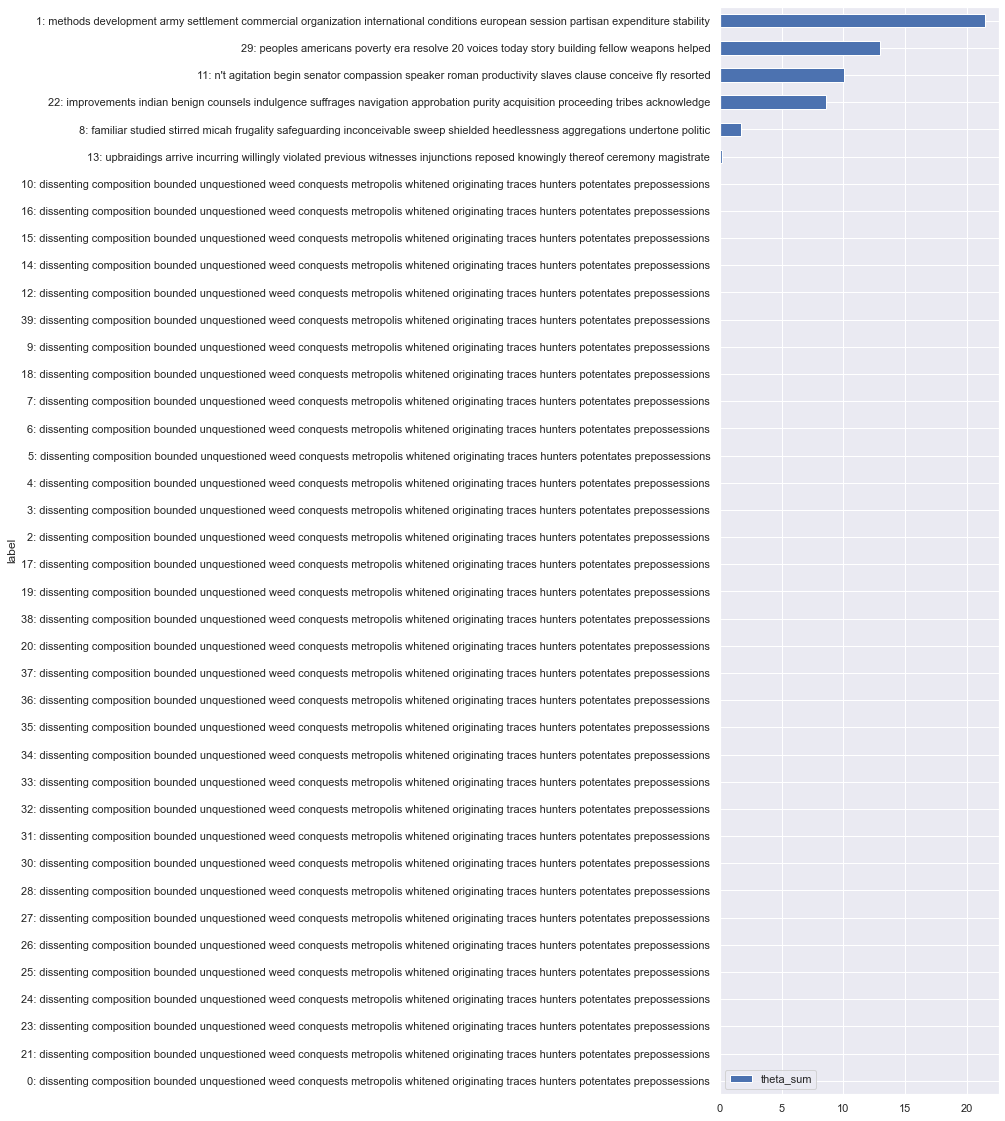

In [120]:
tm.plot_topics()

In [121]:
tm.THETA

topic_id                 0         1         2         3         4         5   \
book_num chap_num                                                               
1        1         0.000017  0.000017  0.000017  0.000017  0.000017  0.000017   
         2         0.000176  0.000176  0.000176  0.000176  0.000176  0.000176   
         3         0.000010  0.717637  0.000010  0.000010  0.000010  0.000010   
         4         0.000013  0.435511  0.000013  0.000013  0.000013  0.000013   
         5         0.000011  0.000011  0.000011  0.000011  0.000011  0.000011   
         6         0.000020  0.000020  0.000020  0.000020  0.000020  0.000020   
         7         0.000020  0.347467  0.000020  0.000020  0.000020  0.000020   
         8         0.000007  0.576868  0.000007  0.000007  0.000007  0.000007   
         9         0.000005  0.281689  0.000005  0.000005  0.000005  0.000005   
         10        0.000008  0.615741  0.000008  0.000008  0.000008  0.000008   
         11        0.000021  0.242351  0.000021  0.000021  0.000021  0.000021   
         12        0.000020  0.697986  0.000020  0.000020  0.000020  0.000020   
         13        0.000006  0.206144  0.000006  0.000006  0.000006  0.000006   
         14        0.000003  0.000003  0.000003  0.000003  0.000003  0.000003   
         15        0.000005  0.790698  0.000005  0.000005  0.000005  0.000005   
         16        0.000022  0.708816  0.000022  0.000022  0.000022  0.000022   
         17        0.000007  0.340153  0.000007  0.000007  0.000007  0.000007   
         18        0.000008  0.429981  0.000008  0.000008  0.000008  0.000008   
         19        0.000007  0.000268  0.000007  0.000007  0.000007  0.000007   
         20        0.000033  0.000033  0.000033  0.000033  0.000033  0.000033   
         21        0.000021  0.430239  0.000021  0.000021  0.000021  0.000021   
         22        0.000018  0.796212  0.000018  0.000018  0.000018  0.000018   
         23        0.000009  0.837829  0.000009  0.000009  0.000009  0.000009   
         24        0.000008  0.999685  0.000008  0.000008  0.000008  0.000008   
         25        0.000014  0.999448  0.000014  0.000014  0.000014  0.000014   
         26        0.000005  0.999786  0.000005  0.000005  0.000005  0.000005   
         27        0.000012  0.783725  0.000012  0.000012  0.000012  0.000012   
         28        0.000006  0.999769  0.000006  0.000006  0.000006  0.000006   
         29        0.000011  0.932008  0.000011  0.000011  0.000011  0.000011   
         30        0.000024  0.673335  0.000024  0.000024  0.000024  0.000024   
         31        0.000004  0.999828  0.000004  0.000004  0.000004  0.000004   
         32        0.000014  0.000014  0.000014  0.000014  0.000014  0.000014   
         33        0.000016  0.173985  0.000016  0.000016  0.000016  0.000016   
         34        0.000007  0.722865  0.000007  0.000007  0.000007  0.000007   
         35        0.000006  0.713750  0.000006  0.000006  0.000006  0.000006   
         36        0.000006  0.841987  0.000006  0.000006  0.000006  0.000006   
         37        0.000013  0.380387  0.000013  0.000013  0.000013  0.000013   
         38        0.000013  0.261611  0.000013  0.000013  0.000013  0.000013   
         39        0.000017  0.569447  0.000017  0.000017  0.000017  0.000017   
         40        0.000041  0.000041  0.000041  0.000041  0.000041  0.000041   
         41        0.000010  0.655595  0.000010  0.000010  0.000010  0.000010   
         42        0.000010  0.267360  0.000010  0.000010  0.000010  0.000010   
         43        0.000014  0.414558  0.000014  0.000014  0.000014  0.000014   
         44        0.000017  0.000017  0.000017  0.000017  0.000017  0.000017   
         45        0.000016  0.070603  0.000016  0.000016  0.000016  0.000016   
         46        0.000011  0.000011  0.000011  0.000011  0.000011  0.000011   
         47        0.000013  0.000013  0.000013  0.000013  0.000013  0.000013   
         48        0.000019  0.

In [122]:
tm.PHI

term_str         $      '    'll          's          (          )  *all*  \
topic_id                                                                    
0         0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
1         3.135498  2.025  0.025   16.582641   1.751886   1.751860  1.025   
2         0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
3         0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
4         0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
5         0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
6         0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
7         0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
8         0.025000  0.025  0.025   12.500908   1.025000   1.025000  0.025   
9         0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
10        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
11        0.914502  3.025  1.025   13.550737  12.240303  12.240299  0.025   
12        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
13        0.025000  0.025  0.025    0.025000   0.618603   0.618546  0.025   
14        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
15        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
16        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
17        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
18        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
19        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
20        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
21        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
22        0.025000  0.025  0.025    0.025000   2.489209   2.489295  0.025   
23        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
24        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
25        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
26        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
27        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
28        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
29        0.025000  0.025  0.025  124.465713   0.025000   0.025000  0.025   
30        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
31        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
32        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
33        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
34        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
35        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
36        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
37        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
38        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   
39        0.025000  0.025  0.025    0.025000   0.025000   0.025000  0.025   

term_str  *down*  *from*   *in*  ...       your    yours  yourself  \
topic_id                         ...                                 
0          0.025   0.025  0.025  ...   0.025000  0.02500     0.025   
1          1.025   1.025  1.025  ...   4.123547  5.81103     0.025   
2          0.025   0.025  0.025  ...   0.025000  0.02500     0.025   
3          0.025   0.025  0.025  ...   0.025000  0.02500     0.025   
4          0.025   0.025  0.025  ...   0.025000  0.02500     0.025   
5          0.025   0.025  0.025  ...   0.025000  0.02500     0.025   
6          0.025   0.025  0.025  ...   0.025000  0.02500     0.025   
7          0.025   0.025  0.025  ...   0.025000  0.02500     0.025   
8          0.025   0.025  0.025  ...   0.025000  0.02500     0.02

In [123]:
tm.TOPIC.sort_values('theta_sum', ascending = False)

phi_sum  theta_sum      h  \
topic_id                                   
1         60805.371922  21.481747   8.90   
29        26119.851631  12.982466   8.17   
11        31671.662229  10.055331   8.92   
22        16534.517361   8.608165   8.38   
8          3114.549045   1.692279   8.87   
13          249.347812   0.150305  12.81   
30          228.050000   0.000874  13.16   
24          228.050000   0.000874  13.16   
25          228.050000   0.000874  13.16   
26          228.050000   0.000874  13.16   
27          228.050000   0.000874  13.16   
28          228.050000   0.000874  13.16   
0           228.050000   0.000874  13.16   
31          228.050000   0.000874  13.16   
32          228.050000   0.000874  13.16   
33          228.050000   0.000874  13.16   
34          228.050000   0.000874  13.16   
35          228.050000   0.000874  13.16   
36          228.050000   0.000874  13.16   
37          228.050000   0.000874  13.16   
38          228.050000   0.000874  13.16   
23          228.050000   0.000874  13.16   
20          228.050000   0.000874  13.16   
21          228.050000   0.000874  13.16   
9           228.050000   0.000874  13.16   
2           228.050000   0.000874  13.16   
3           228.050000   0.000874  13.16   
4           228.050000   0.000874  13.16   
5           228.050000   0.000874  13.16   
6           228.050000   0.000874  13.16   
7           228.050000   0.000874  13.16   
10          228.050000   0.000874  13.16   
19          228.050000   0.000874  13.16   
12          228.050000   0.000874  13.16   
14          228.050000   0.000874  13.16   
15          228.050000   0.000874  13.16   
16          228.050000   0.000874  13.16   
17          228.050000   0.000874  13.16   
18          228.050000   0.000874  13.16   
39          228.050000   0.000874  13.16   

                                              top_terms_rel  \
topic_id                                                      
1         methods development army settlement commercial...   
29        peoples americans poverty era resolve 20 voice...   
11        n't agitation begin senator compassion speaker...   
22        improvements indian benign counsels indulgence...   
8         familiar studied stirred micah frugality safeg...   
13        upbraidings arrive incurring willingly violate...   
30        dissenting composition bounded unquestioned we...   
24        dissenting composition bounded unquestioned we...   
25        dissenting composition bounded unquestioned we...   
26        dissenting composition bounded unquestioned we...   
27        dissenting composition bounded unquestioned we...   
28        dissenting composition bounded unquestioned we...   
0         dissenting composition bounded unquestioned we...   
31        dissenting composition bounded unquestioned we...   
32        dissenting composition bounded unquestioned we...   
33        dissenting composition bounded unquestioned we...   
34        dissenting composition bounded unquestioned we...   
35        dissenting composition bounded unquestioned we...   
36        dissenting composition bounded unquestioned we...   
37        dissenting composition bounded unquestioned we...   
38        dissenting composition bounded unquestioned we...   
23        dissenting composition bounded unquestioned we...   
20        dissenting composition bounded unquestioned we...   
21        dissenting composition bounded unquestioned we...   
9         dissenting composition bounded unquestioned we...   
2         dissenting composition bounded unquestioned we...   
3         dissenting composition bounded unquestioned we...   
4         dissenting composition bounded unquestioned we...   
5         dissenting composition bounded unquestioned we...   
6         dissenting composition bounded unquestioned we...   
7         dissenting composition bounded unquestioned we...   
10        dissenting composition bounded unquestioned we...   
19        dissenting com

In [124]:
top_topic = tm.TOPIC.theta_sum.idxmax()
top_topic

1

In [125]:
tm.TOPIC.sort_values('theta_sum', ascending = False).loc[top_topic, 'top_terms_rel']

'methods development army settlement commercial organization international conditions european session partisan expenditure stability'

# Word Embeddings

In [126]:
w2v_params = dict(
    min_count = 10,
    workers = 1,
    # vector_size = 246,
    vector_size = 100,
    window = 2    
)

In [127]:
tsne_params = dict(
    learning_rate = 200., #'auto' or [10.0, 1000.0]
    perplexity = 40,
    n_components = 2,
    init = 'random',
    n_iter = 1000,
    random_state = 23    
)

In [128]:
from gensim.models import word2vec
from sklearn.manifold import TSNE

In [129]:
VOCAB['pos_max'] = TOKENS.value_counts(['term_str','pos']).unstack().idxmax(1)
VOCAB['pos_group'] = VOCAB.pos_max.str.slice(0,2)

In [130]:
CHAPS = TOKENS.groupby(OHCO[:2]+['term_str']).term_str.count()\
    .unstack(fill_value=0).astype('bool').astype('int')

In [131]:
#CHAPS.head()

In [132]:
VOCAB['df'] = CHAPS.sum()
VOCAB['dfidf'] = VOCAB.df * np.log2(len(CHAPS)/VOCAB.df)
VOCAB.sort_values('dfidf', ascending=False)

term_rank     n         p          i  n_chars max_pos  n_pos  \
term_str                                                                   
courage           439    32  0.000233  12.065153        7      NN      1   
population        427    34  0.000248  11.977690       10      NN      1   
community         430    33  0.000241  12.020759        9      NN      1   
patriotism        440    32  0.000233  12.065153       10      NN      1   
example           393    36  0.000263  11.895228        7      NN      1   
...               ...   ...       ...        ...      ...     ...    ...   
all                24   784  0.005717   7.450443        3      DT      5   
are                25   757  0.005520   7.501004        3     VBP      3   
has                28   599  0.004368   7.838741        3     VBZ      1   
of                  2  6911  0.050399   4.310474        2      IN      2   
the                 1  9792  0.071408   3.807765        3      DT      2   

                           cat_pos  stop   p_stem  term_rank2  zipf_k  \
term_str                                                                
courage                       {NN}     0   courag         186   14048   
population                    {NN}     0    popul         184   14518   
community                     {NN}     0   commun         185   14190   
patriotism                    {NN}     0  patriot         186   14080   
example                       {NN}     0   exampl         182   14148   
...                            ...   ...      ...         ...     ...   
all         {DT, RB, VB, NNP, PDT}     1      all          24   18816   
are                 {NNP, VBP, IN}     1      are          25   18925   
has                          {VBZ}     1       ha          28   16772   
of                       {NNP, IN}     1       of           2   13822   
the                      {DT, NNP}     1      the           1    9792   

            zipf_k2      dfidf  tfidf_mean  tfidf_max pos_max pos_group  df  
term_str                                                                     
courage        5952  29.188632    0.019226   0.104245      NN        NN  20  
population     6256  29.188632    0.012143   0.025163      NN        NN  20  
community      6105  29.188632    0.014199   0.052123      NN        NN  20  
patriotism     5952  29.188632    0.010397   0.029483      NN        NN  20  
example        6552  29.188632    0.012375   0.029483      NN        NN  20  
...             ...        ...         ...        ...     ...       ...  ..  
all           18816   0.000000    0.000000   0.000000      DT        DT  55  
are           18925   0.000000    0.000000   0.000000     VBP        VB  55  
has           16772   0.000000    0.000000   0.000000     VBZ        VB  55  
of            13822   0.000000    0.000000   0.000000      IN        IN  55  
the            9792   0.000000    0.000000   0.000000      DT        DT  55  

[9122 rows x 19 columns]

In [133]:
SENTS = TOKENS.groupby(OHCO[:-1]).term_str.apply(lambda  x:  x.tolist())

In [134]:
SENTS.head().tolist()

[['fellow-citizens',
  'of',
  'the',
  'senate',
  'and',
  'of',
  'the',
  'house',
  'of',
  'representatives'],
 ['among',
  'the',
  'vicissitudes',
  'incident',
  'to',
  'life',
  'no',
  'event',
  'could',
  'have',
  'filled',
  'me',
  'with',
  'greater',
  'anxieties',
  'than',
  'that',
  'of',
  'which',
  'the',
  'notification',
  'was',
  'transmitted',
  'by',
  'your',
  'order',
  ',',
  'and',
  'received',
  'on',
  'the',
  '14th',
  'day',
  'of',
  'the',
  'present',
  'month'],
 ['on',
  'the',
  'one',
  'hand',
  ',',
  'i',
  'was',
  'summoned',
  'by',
  'my',
  'country',
  ',',
  'whose',
  'voice',
  'i',
  'can',
  'never',
  'hear',
  'but',
  'with',
  'veneration',
  'and',
  'love',
  ',',
  'from',
  'a',
  'retreat',
  'which',
  'i',
  'had',
  'chosen',
  'with',
  'the',
  'fondest',
  'predilection',
  ',',
  'and',
  ',',
  'in',
  'my',
  'flattering',
  'hopes',
  ',',
  'with',
  'an',
  'immutable',
  'decision',
  ',',
  'as',
  '

In [135]:
model = word2vec.Word2Vec(SENTS.values, **w2v_params)

In [136]:
W2V = pd.DataFrame(model.wv.get_normed_vectors(), index=model.wv.index_to_key)
W2V.index.name = 'term_str'
W2V = W2V.sort_index()

In [137]:
W2V.head()

0         1         2         3         4         5   \
term_str                                                               
's       -0.029827  0.136319  0.058147  0.066901 -0.008694 -0.197231   
(        -0.046808  0.129426  0.041243  0.040727  0.019053 -0.192010   
)        -0.037546  0.125674  0.040448  0.034185  0.008039 -0.192621   
,        -0.042775  0.116797  0.041468  0.042016  0.037572 -0.181388   
--       -0.039968  0.126295  0.039199  0.035829  0.021618 -0.193559   

                6         7         8         9   ...        90        91  \
term_str                                          ...                       
's        0.092823  0.240145 -0.105787 -0.107414  ...  0.208416  0.100582   
(         0.072801  0.264493 -0.098738 -0.078159  ...  0.228987  0.104741   
)         0.063940  0.252384 -0.082329 -0.070875  ...  0.232392  0.094586   
,         0.050886  0.239527 -0.111568 -0.077226  ...  0.217305  0.102620   
--        0.075984  0.259633 -0.084068 -0.091761  ...  0.235812  0.103570   

                92        93        94        95        96        97  \
term_str                                                               
's        0.042387 -0.048969  0.204233  0.152765  0.081343 -0.044640   
(         0.060932 -0.031520  0.199982  0.137849  0.099807 -0.006601   
)         0.067202 -0.023277  0.213712  0.138211  0.102635  0.009046   
,         0.067126 -0.017623  0.193359  0.143017  0.112863 -0.003126   
--        0.058861 -0.016458  0.205106  0.139197  0.090629 -0.005900   

                98        99  
term_str                      
's       -0.026035  0.012017  
(        -0.004148 -0.004299  
)        -0.006153 -0.007949  
,        -0.002454 -0.013083  
--       -0.009045 -0.005072  

[5 rows x 100 columns]

In [138]:
tsne_engine = TSNE(**tsne_params)
tsne_model = tsne_engine.fit_transform(W2V)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/t_sne.py:344: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/t_sne.py:345: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/t_sne.py:344: DeprecationWarning:

`np.f

In [139]:
COORDS = pd.DataFrame(tsne_model, columns=['x','y'], index=W2V.index)\
    .join(VOCAB, how='left')[['x','y','n','dfidf','pos_group']]

In [140]:
COORDS

x          y     n      dfidf pos_group
term_str                                                 
's        10.510366 -25.897818   167  19.342342        PO
(         -4.355188 -10.677697    18  24.594316         (
)         -1.989218   5.748839    18  24.594316         )
,         -4.189874  -6.381969  6809   0.000000         ,
--        -2.844212  -7.768983   366  10.658231         :
...             ...        ...   ...        ...       ...
yet       -9.662106  23.972305    79  24.319865        RB
you      -11.129327  26.536106   163  22.822684        PR
young      3.407746 -13.132401    19  27.051960        JJ
your       3.057079  -1.312216   109  26.777983        PR
zeal      11.344523 -15.421211    12  22.250878        NN

[1452 rows x 5 columns]

In [141]:
px.scatter(COORDS.reset_index().sample(1000), 
           'x', 'y', 
           text='term_str', 
           color='pos_group', 
           hover_name='term_str',          
           size='dfidf',           
           height=1000, width=1200).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

In [142]:
px.scatter(COORDS.reset_index().sort_values('dfidf', ascending=False).head(1000), 
           'x', 'y', 
           text='term_str', 
           color='pos_group', 
           hover_name='term_str',          
           size='dfidf',           
           height=1000, width=1200).update_traces(
                mode='markers+text', 
                textfont=dict(color='black', size=14, family='Arial'),
                textposition='top center')

In [143]:
def complete_analogy(A, B, C, n=2):
    try:
        cols = ['term', 'sim']
        return pd.DataFrame(model.wv.most_similar(positive=[B, C], negative=[A])[0:n], columns=cols)
    except KeyError as e:
        print('Error:', e)
        return None
    
def get_most_similar(positive, negative=None):
    return pd.DataFrame(model.wv.most_similar(positive, negative), columns=['term', 'sim'])

In [144]:
complete_analogy('nation', 'serve', 'war', 3)

term       sim
0       them  0.990872
1  ourselves  0.990120
2         an  0.990052

In [145]:
get_most_similar('peace')

term       sim
0      freedom  0.996482
1          war  0.996224
2        human  0.995730
3          his  0.995229
4  maintenance  0.995021
5        every  0.994898
6          law  0.994860
7      welfare  0.994546
8      liberty  0.994407
9        state  0.994342

In [146]:
get_most_similar('man')

term       sim
0   confidence  0.998852
1        being  0.998692
2   generation  0.998589
3    democracy  0.998567
4       either  0.998526
5          two  0.998498
6  citizenship  0.998488
7      promise  0.998461
8        favor  0.998394
9         love  0.998389

In [147]:
W2V.describe().T.style.background_gradient(cmap='GnBu')

In [148]:
VSIGS = VOCAB.sort_values('dfidf').tail(1000)

In [149]:
W2Vp = (W2V - W2V.min()) #[0].sort_values().plot()
W2Vp = W2Vp.loc[SIGS.index]
W2Vp = W2Vp / W2Vp.sum()

In [150]:
topics = []
for i in W2Vp.columns:
    top_words = ' '.join(W2V.sort_values(i, ascending=False).index[:10])
    print(i, top_words)
    topics.append((i, top_words))

0 the united our their a government my its constitution union
1 been nation for country at world in on constitution time
2 the united our their all states constitution its union people
3 the our of this a its great every world 's
4 has have must shall will can may should is if
5 been united we i have be it not has they
6 united constitution world people of union in new several on
7 dedication construction weight seas are decent encouraging councils cities servants
8 have shall has been can states must will may would
9 may should shall can have will must been i do
10 be we i been they it not no is as
11 the states their our united of and my those a
12 be we not i it do can they so would
13 the united a our union its all constitution several american
14 is more than as be own only nation there country
15 of the united our constitution states world their government and
16 of government in our world own for we and at
17 united been union of are have constitution southern world which
18 be 

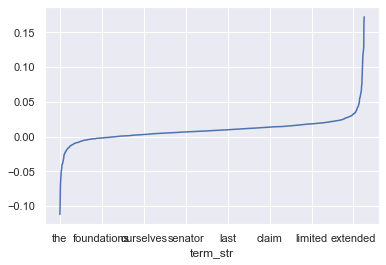

In [151]:
W2V[4].sort_values().plot()

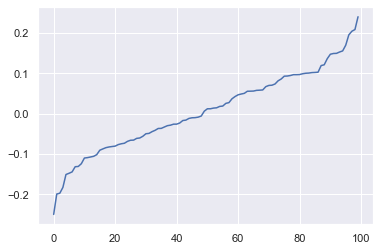

In [152]:
W2V.iloc[0].sort_values().reset_index(drop=True).plot()

# Sentiment

In [153]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [154]:
SALEX = pd.read_csv('salex_nrc.csv').set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]

In [155]:
TOKENS = TOKENS.join(SALEX, on='term_str', how='left')
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

In [156]:
#TOKENS.sample(50)

In [157]:
TOKENS[emo_cols] = TOKENS[emo_cols].fillna(0)

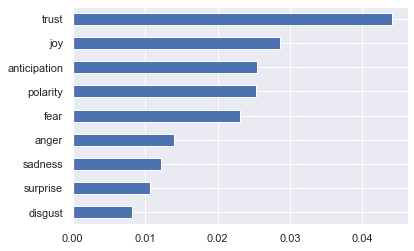

In [158]:
TOKENS[emo_cols].mean().sort_values().plot.barh()

In [159]:
TOKEN_chaps = TOKENS.groupby("chap_num")[emo_cols].mean()

In [160]:
#TOKEN_chaps

In [161]:
def plot_sentiments(df, emo='polarity'):
    FIG = dict(figsize=(25,5), legend=True, fontsize=14, rot=45)
    df[emo].plot(**FIG)

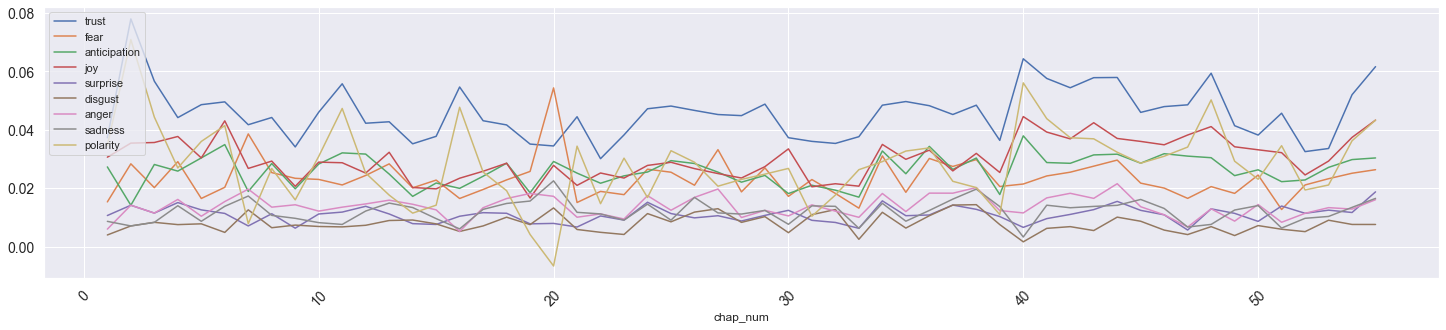

In [162]:
plot_sentiments(TOKEN_chaps, ['trust', 'fear', 'anticipation', 'joy', 'surprise', 'disgust', 'anger', 'sadness', 'polarity'])

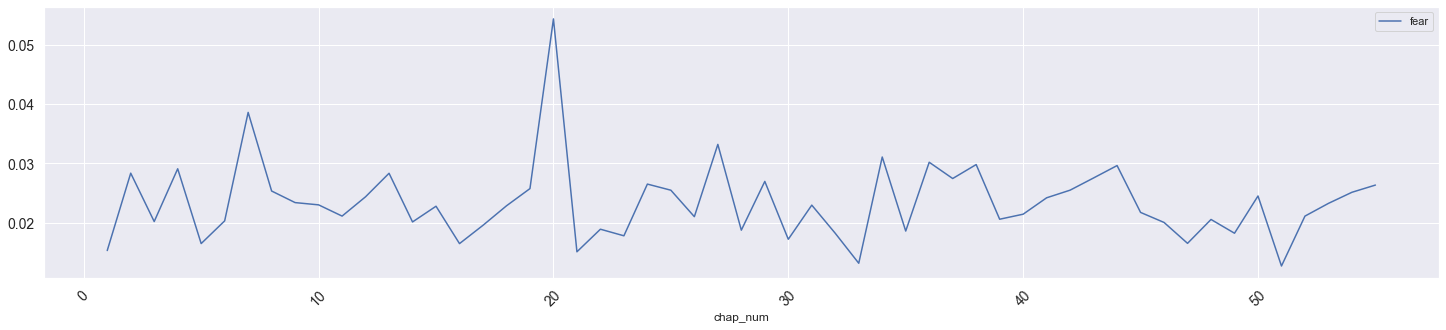

In [163]:
plot_sentiments(TOKEN_chaps, ['fear'])

In [164]:
COORDS.to_csv("COORDS.csv")